In [2]:
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
#import warnings
#warnings.filterwarnings("ignore")


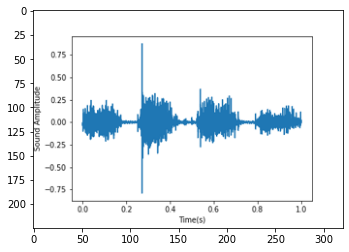

In [3]:
## Importing the image from covid file
image=Image.open('C:/Users/Asus/Documents/COVID19/spectrograms/1.png')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)

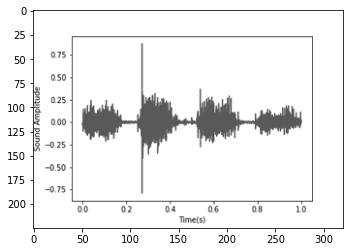

In [4]:
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [6]:
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

In [8]:
# What if we tune the above function more??
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
gray_segmented_2=arr.reshape(gray.shape[0],gray.shape[1])
    

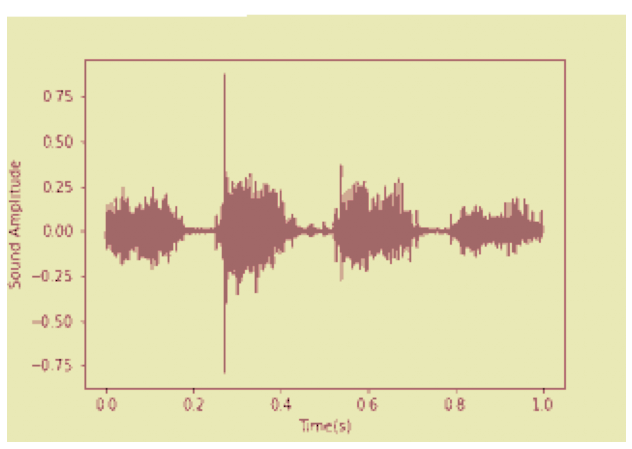

In [9]:
# There are 5 segments in the below image :)
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

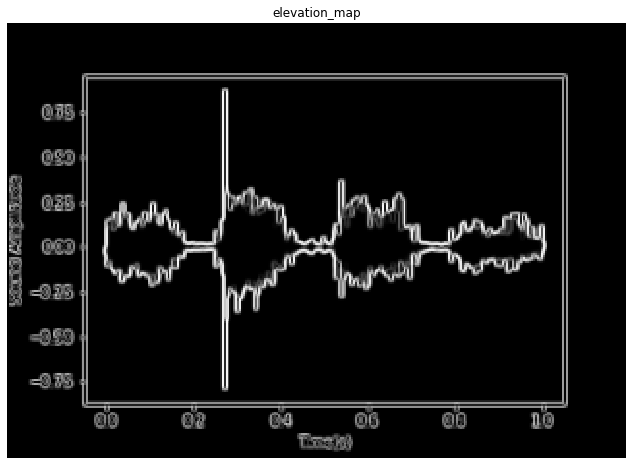

In [10]:
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

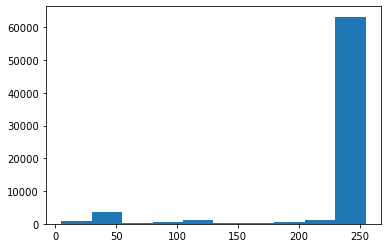

In [11]:
plt.hist(imm.flatten())
plt.show()

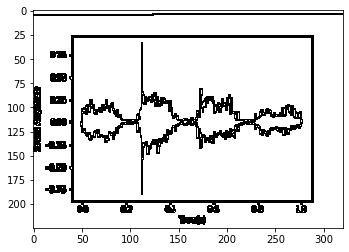

In [22]:
# we are gonna use kernel laplace here to discover the edges in the image :)
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

out_l = ndimage.convolve(gray_segmented_2, kernel_laplace, mode='reflect')
arr=[]
for i in out_l.flatten():
    if i == 0:
        arr.append(0)
    else:
        arr.append(-100)
arr=np.array(arr)
arr=arr.reshape(out_l.shape[0],out_l.shape[1])
plt.imshow(arr,cmap='gray', interpolation='nearest')


In [23]:
im=image/255
pic=im.reshape(im.shape[0]*im.shape[1],im.shape[2])

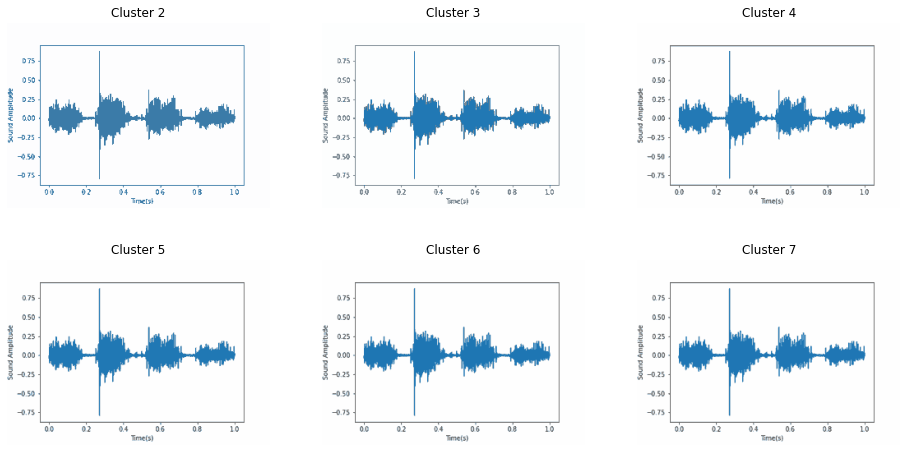

In [24]:
# Since we know 5 segments was looking great on the image we are gonna do 5 clusters here but you can try more too :)
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster '+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()

In [25]:
### Spectrogram from whole audio files. I had divided audio files to 1 second chunks and then extracted spectrograms. 
### However, now I want to do convert whole audio without background noise to images and do image segmentation. 

1. Getting rid of silent parts in beginning and end parts of a sound

(I have trimmed 288 audio files without noise. Just want to extract spectrogram images from them )

In [27]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob 
import librosa as lr

In [28]:
data_dir ='C:/Users/Asus/Documents/COVID19/chunks_covid_trimmed/'
audio_files =glob(data_dir + '/*.wav')
len(audio_files)

288

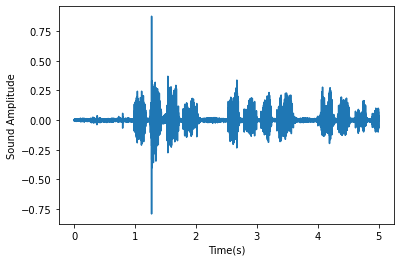

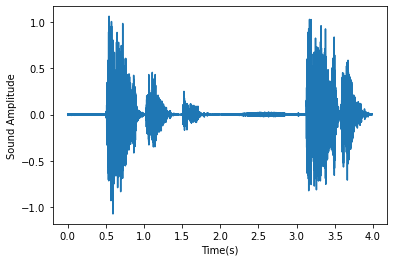

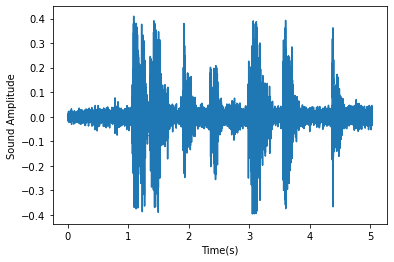

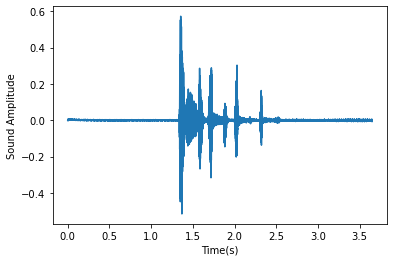

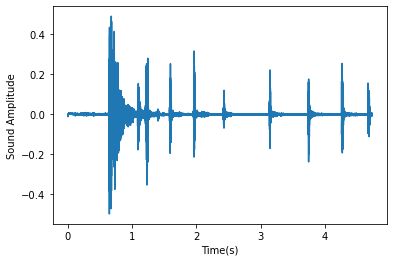

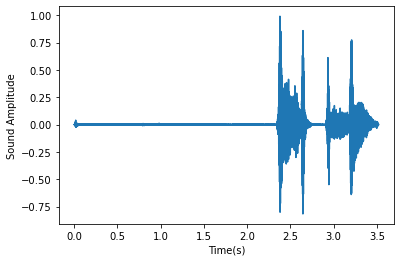

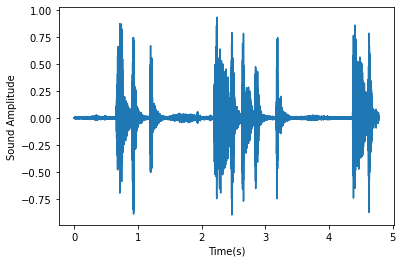

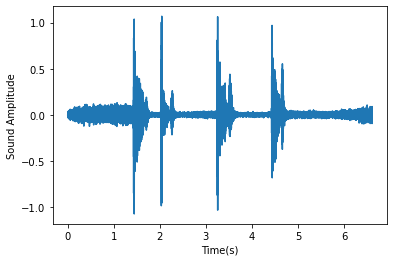

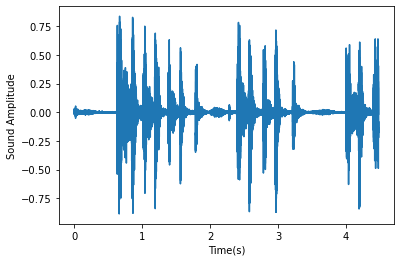

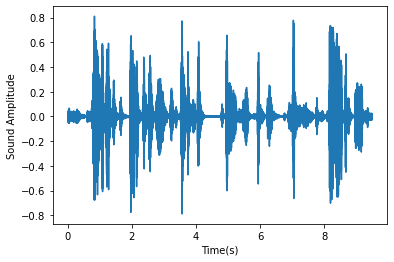

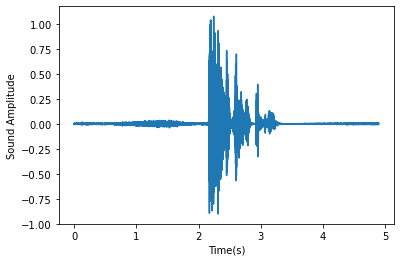

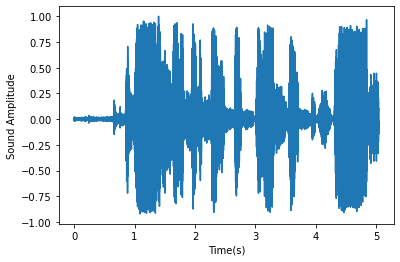

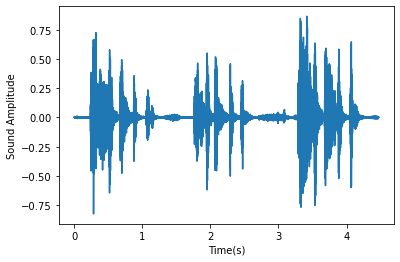

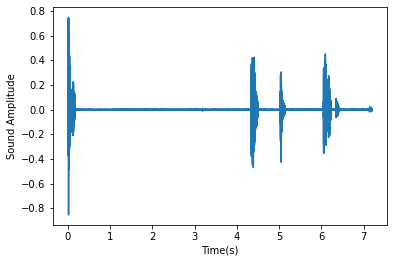

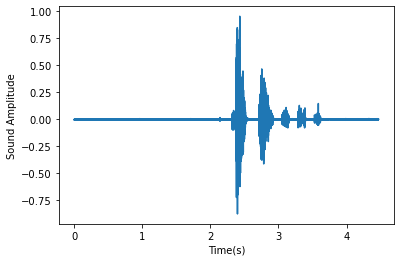

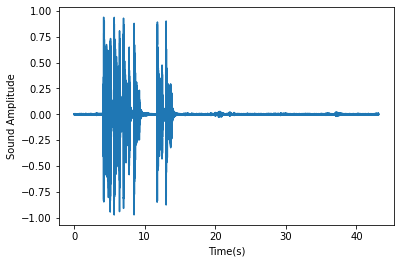

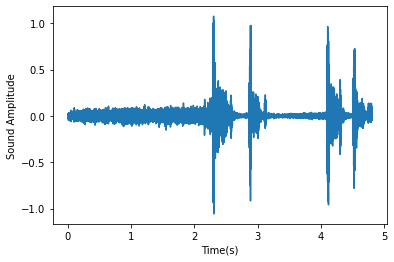

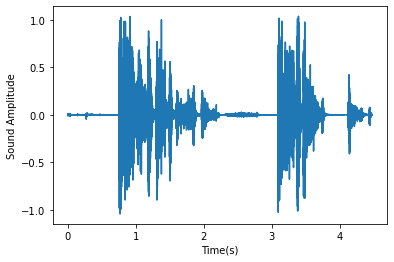

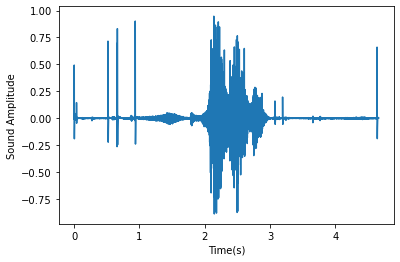

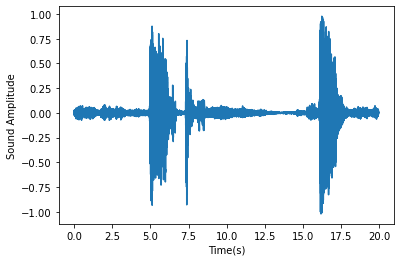

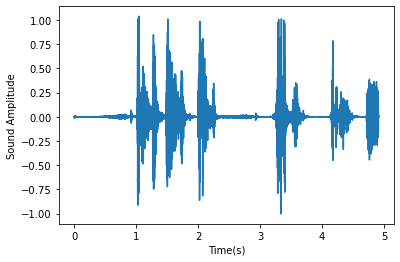

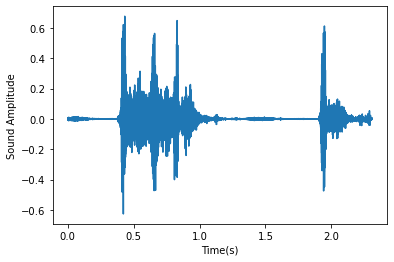

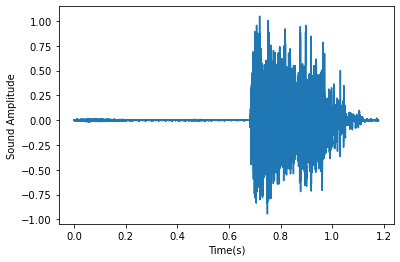

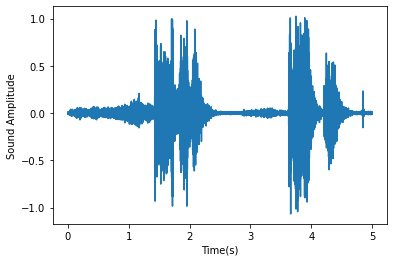

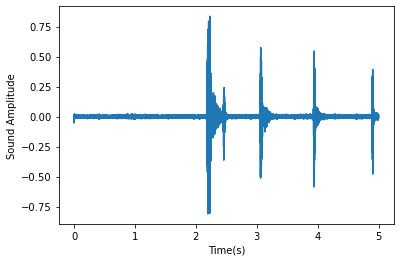

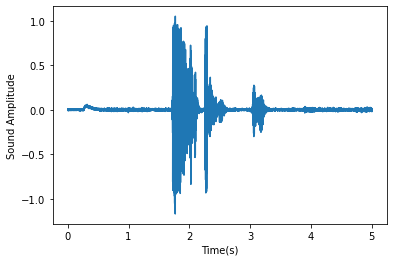

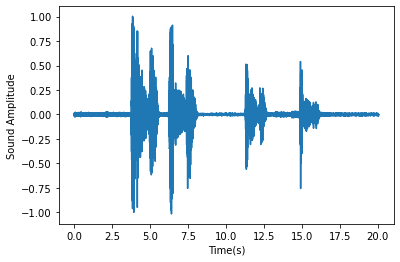

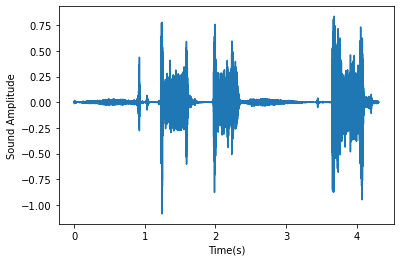

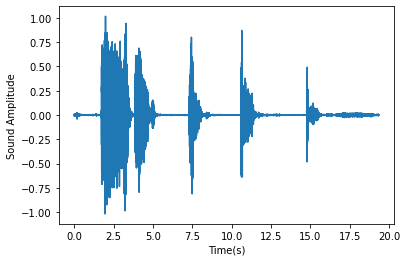

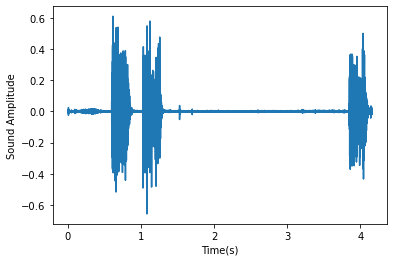

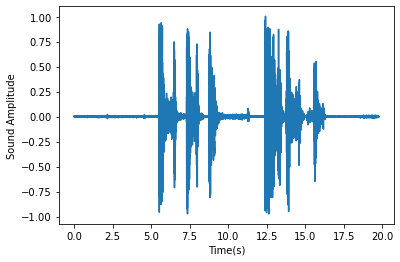

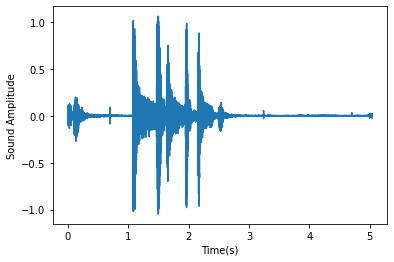

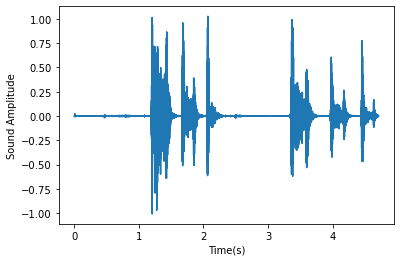

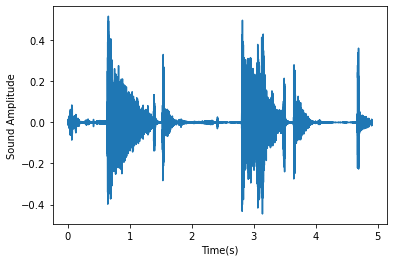

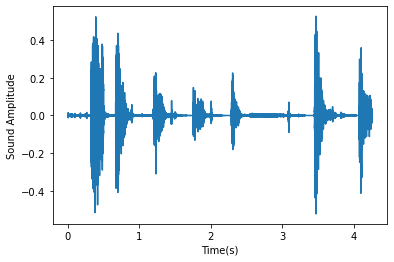

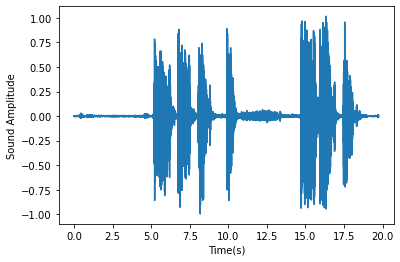

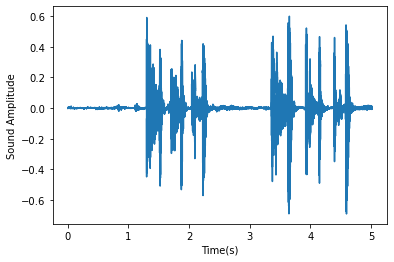

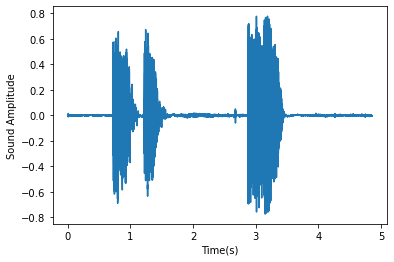

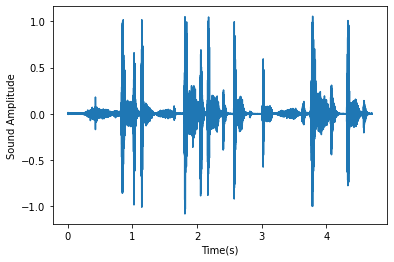

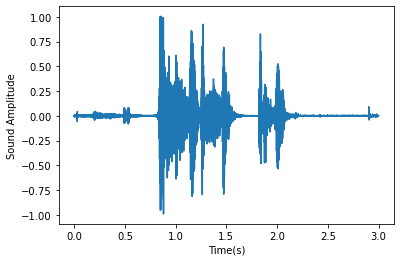

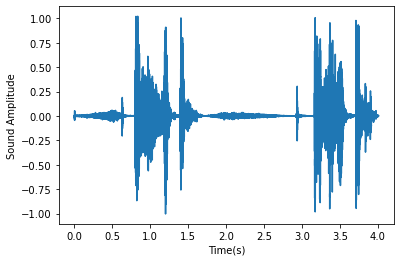

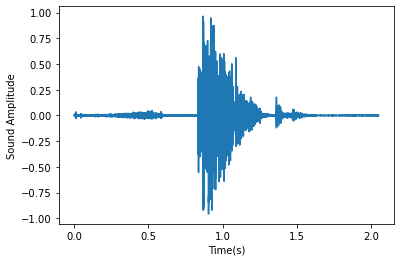

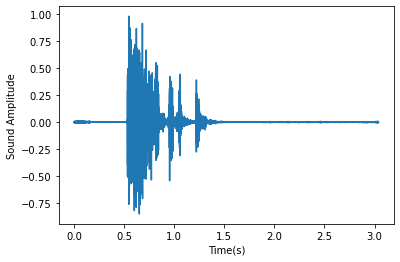

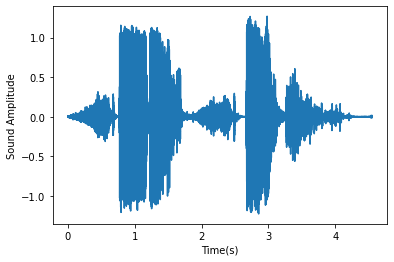

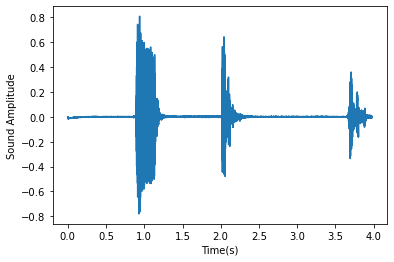

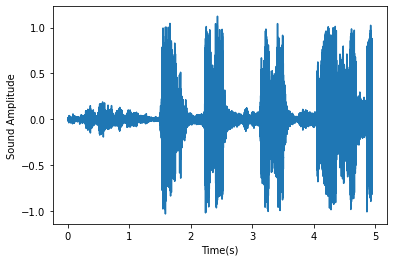

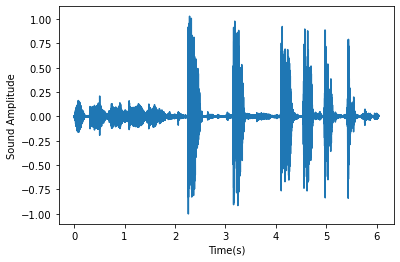

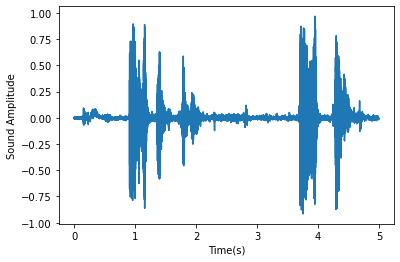

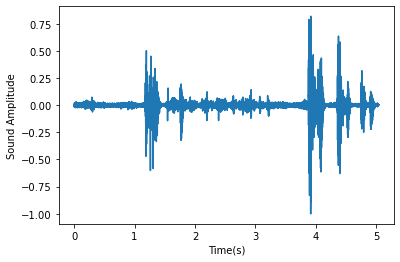

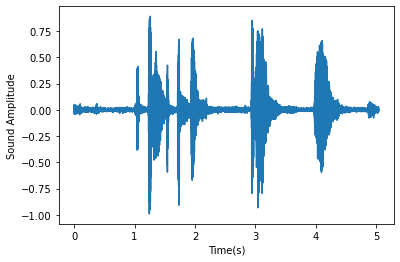

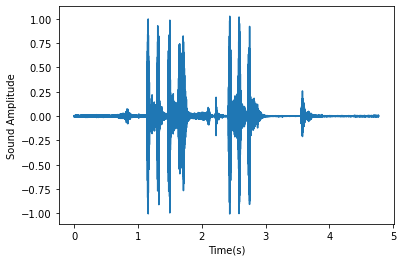

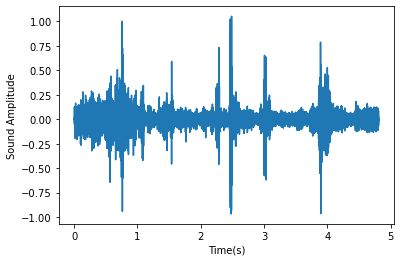

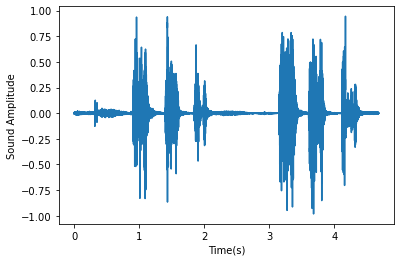

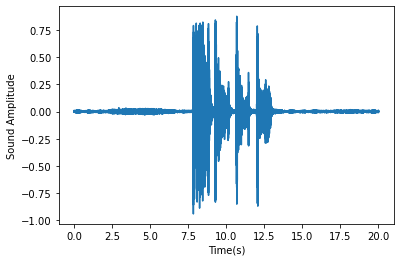

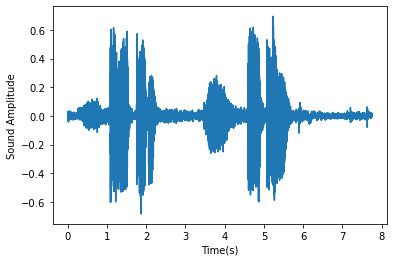

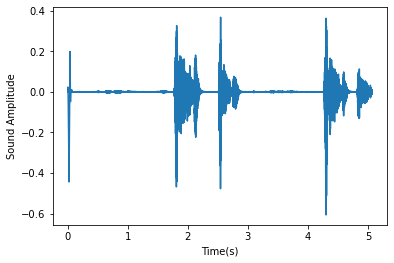

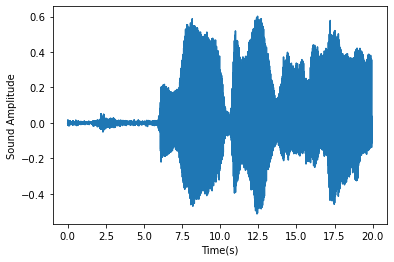

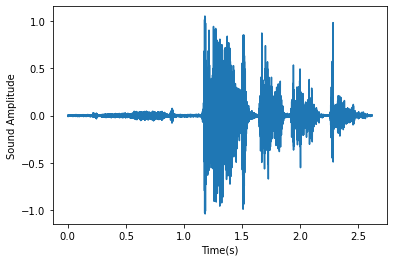

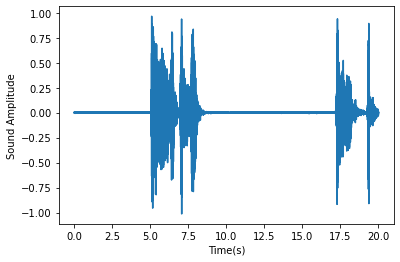

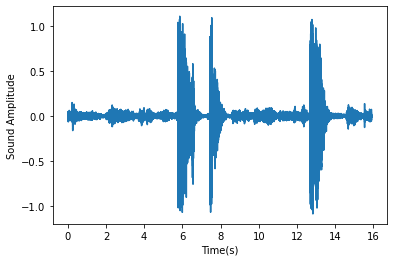

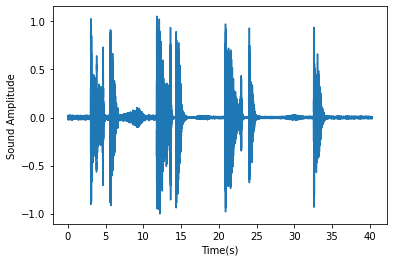

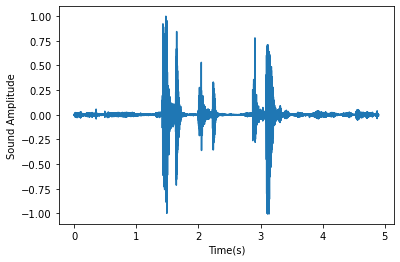

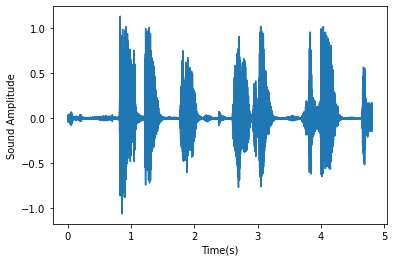

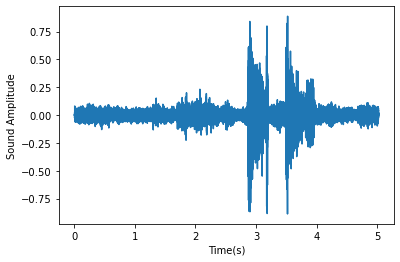

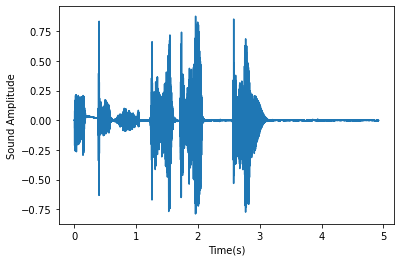

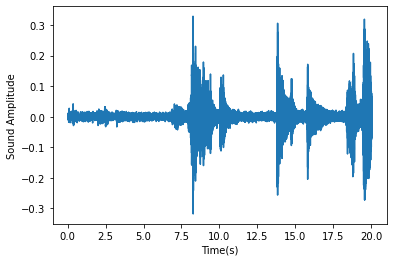

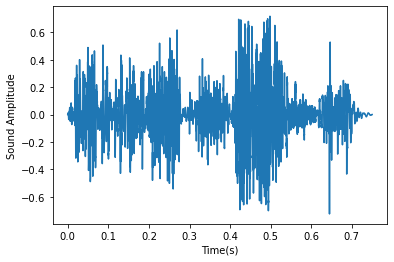

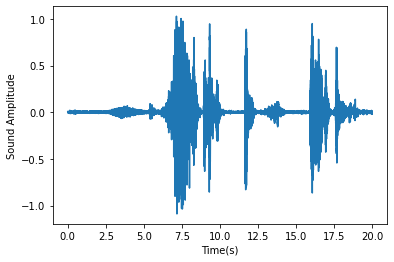

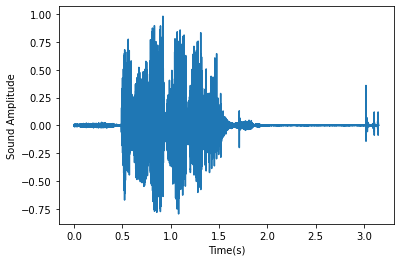

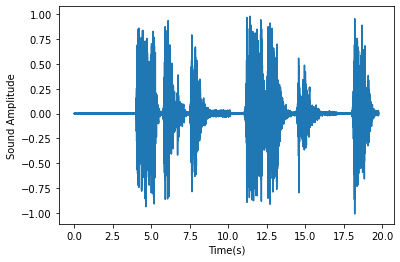

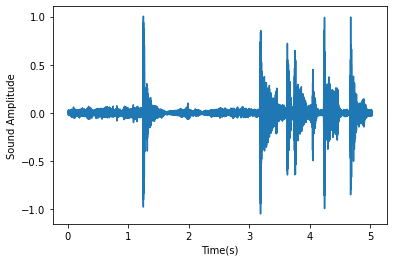

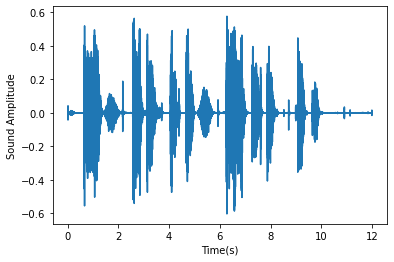

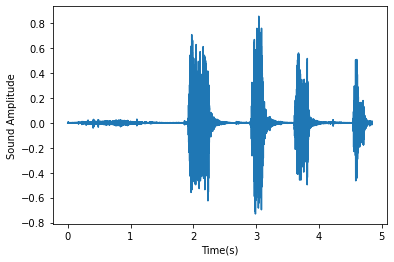

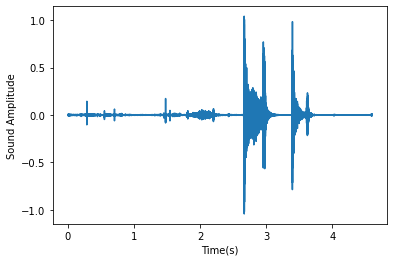

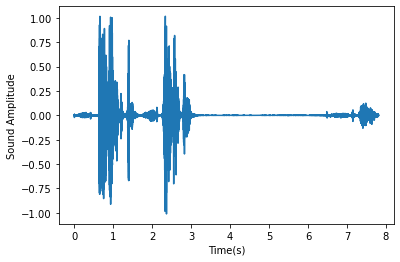

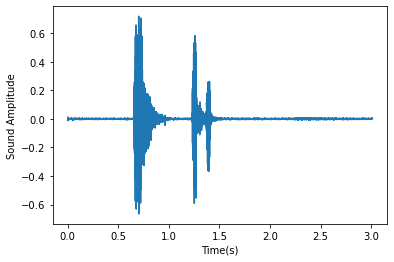

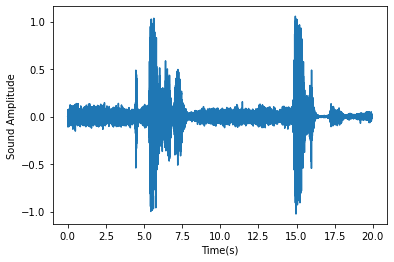

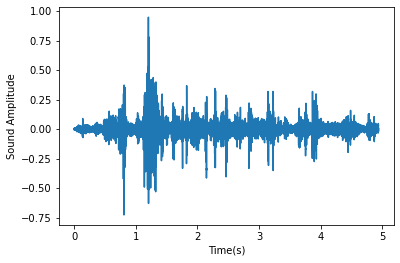

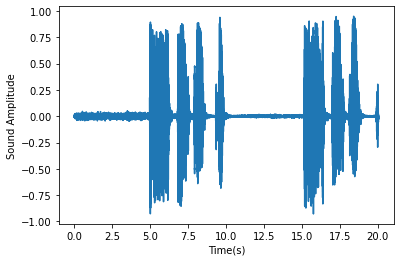

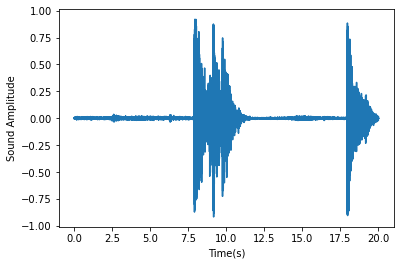

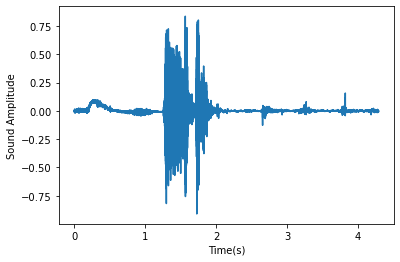

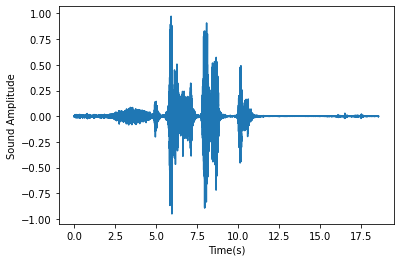

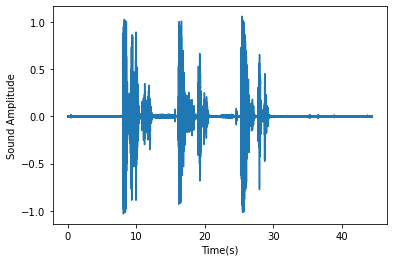

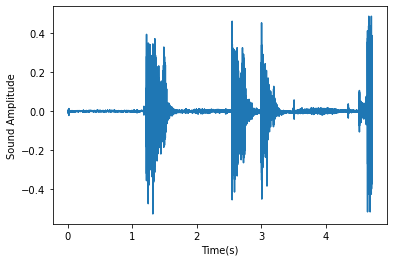

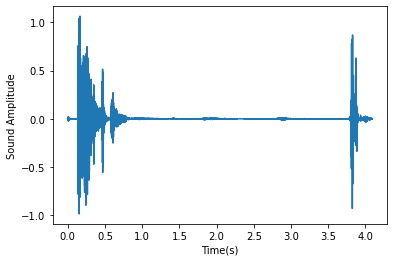

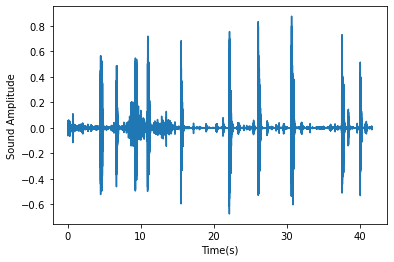

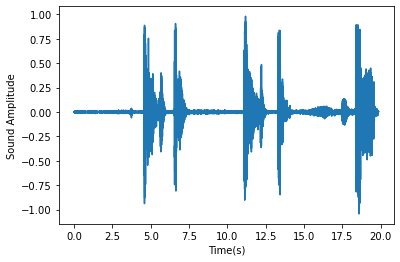

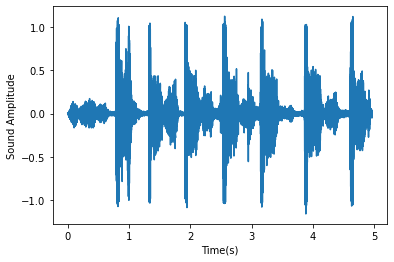

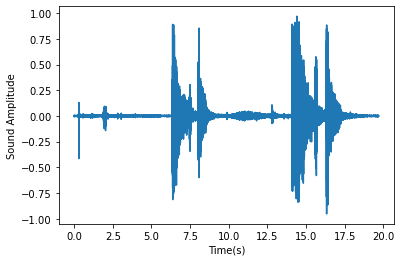

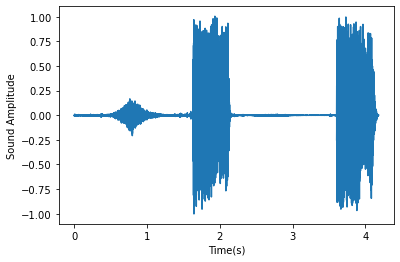

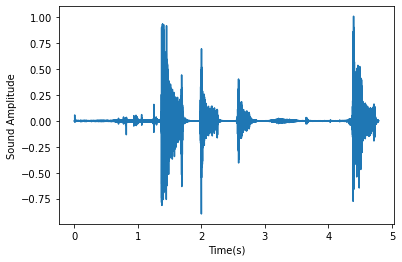

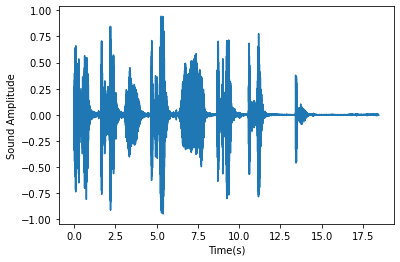

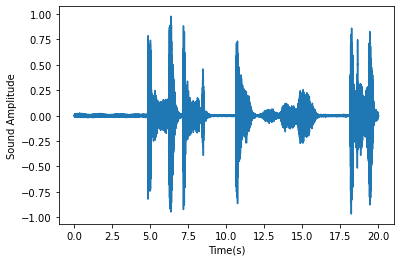

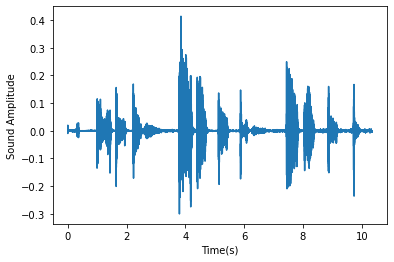

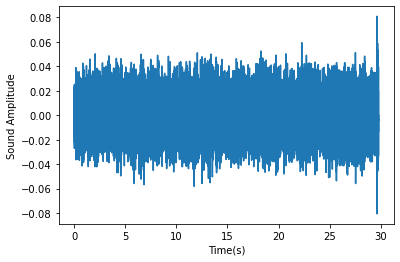

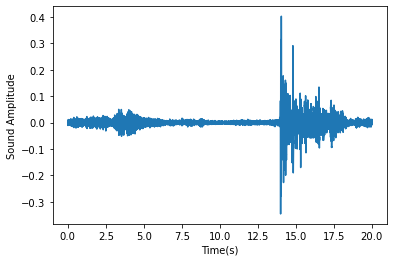

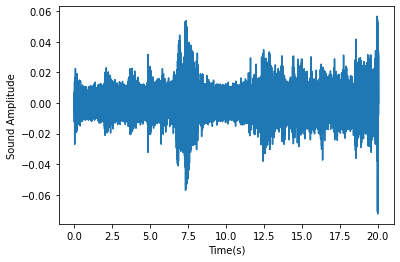

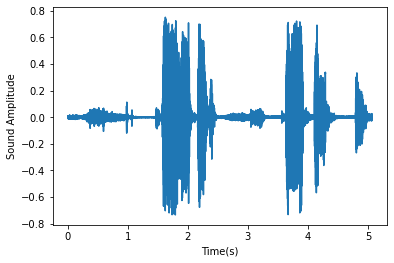

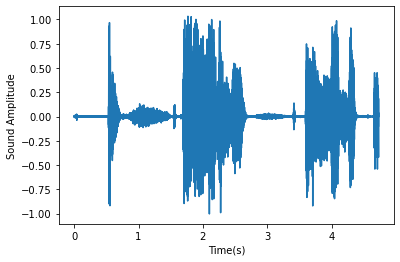

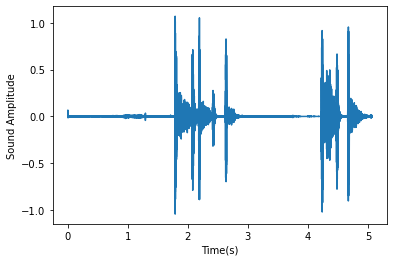

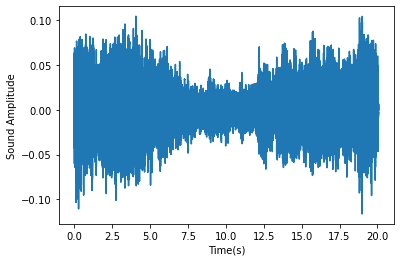

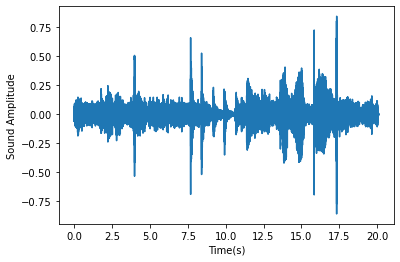

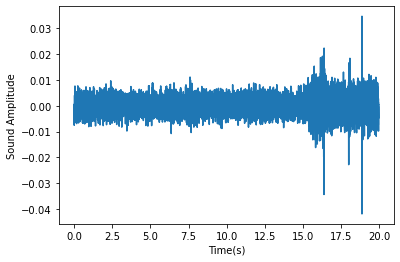

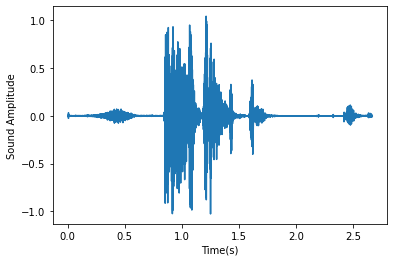

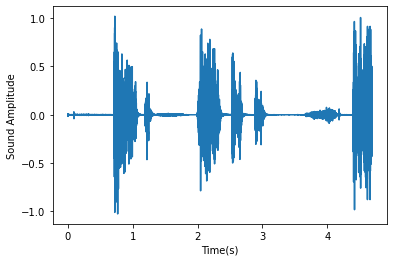

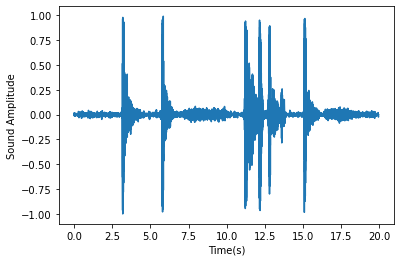

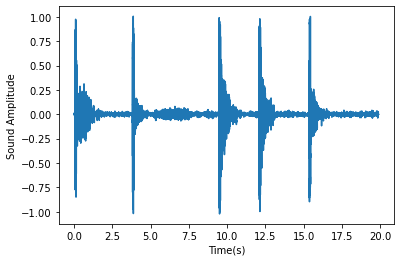

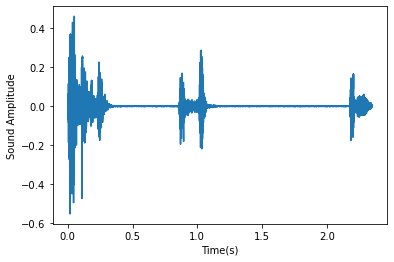

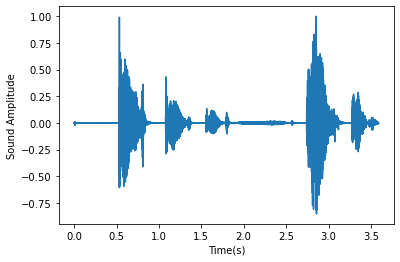

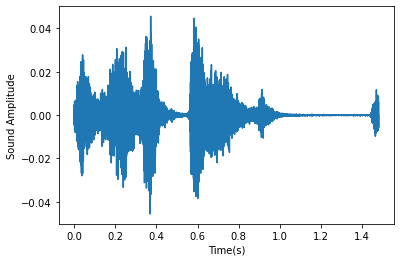

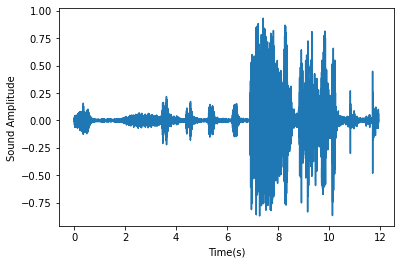

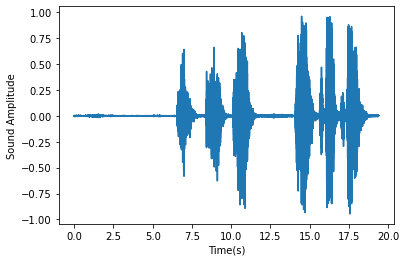

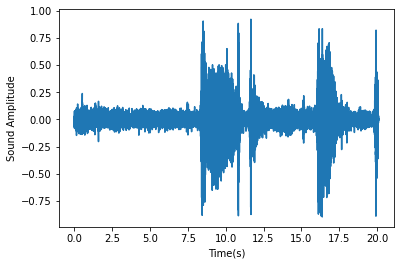

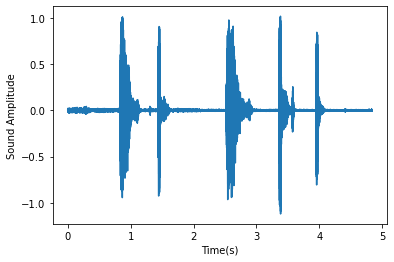

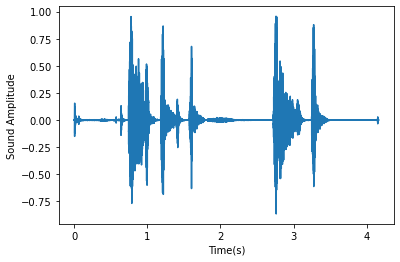

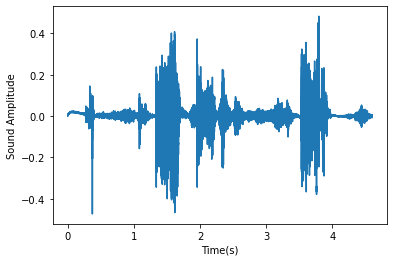

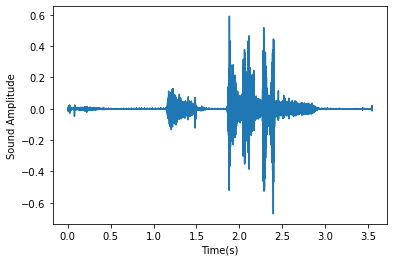

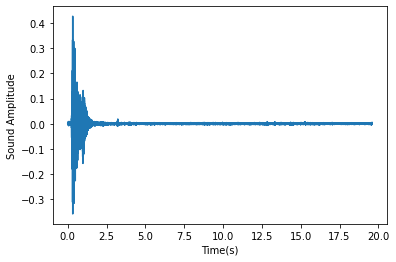

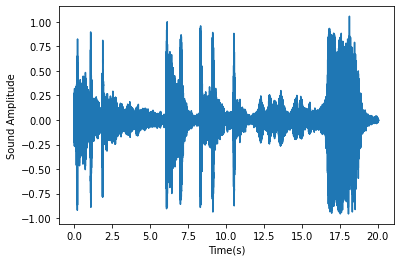

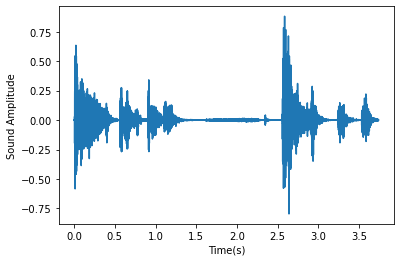

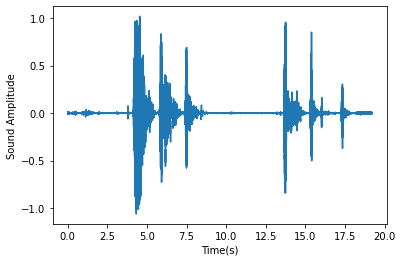

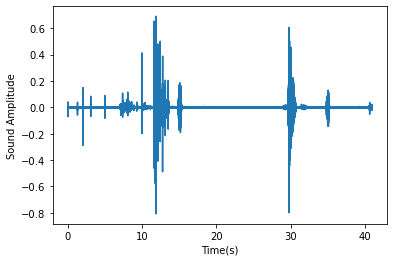

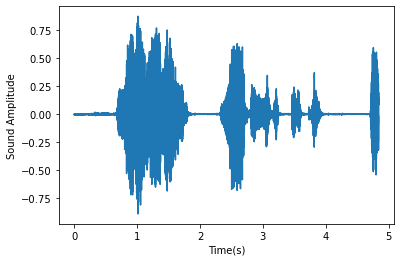

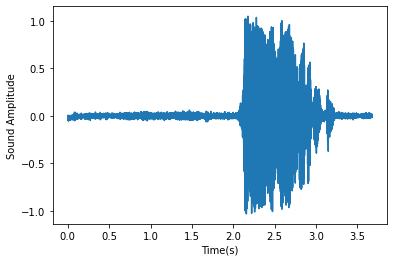

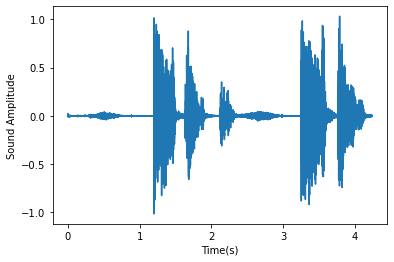

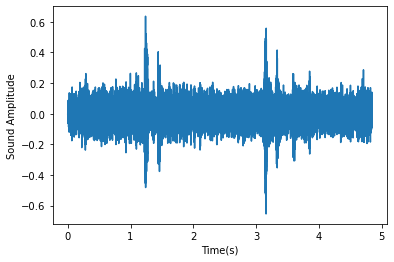

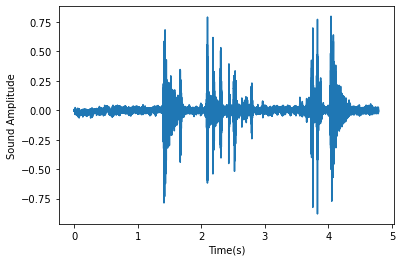

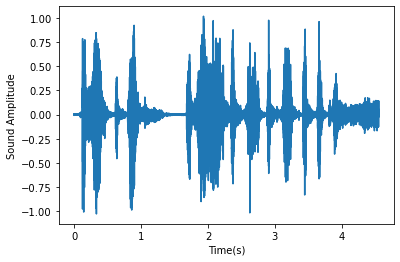

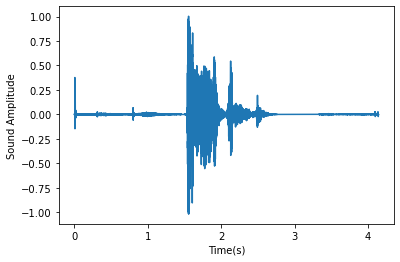

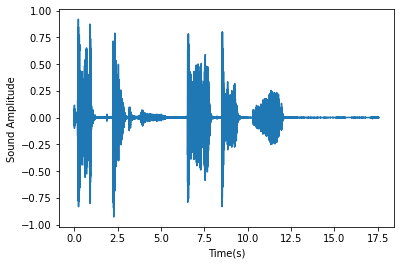

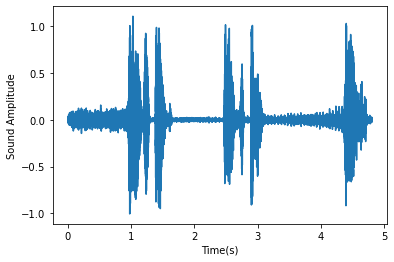

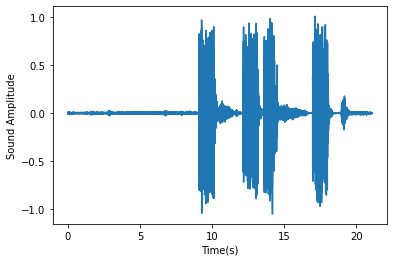

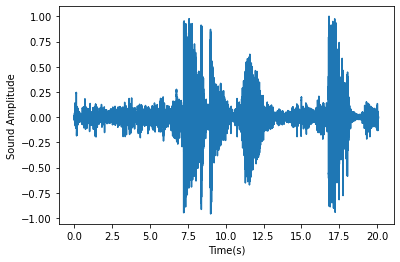

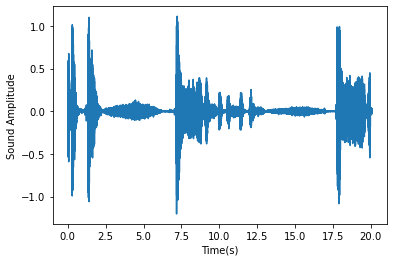

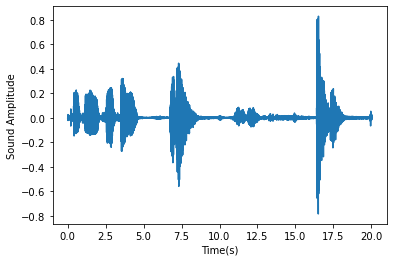

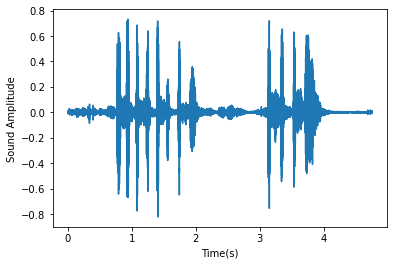

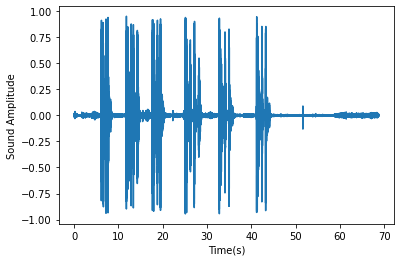

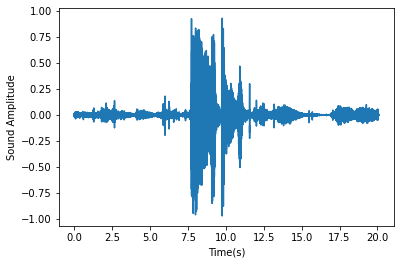

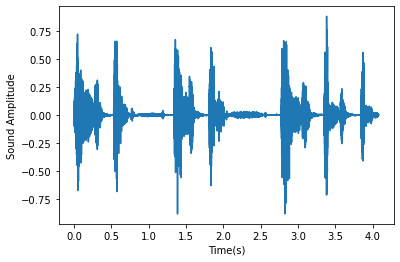

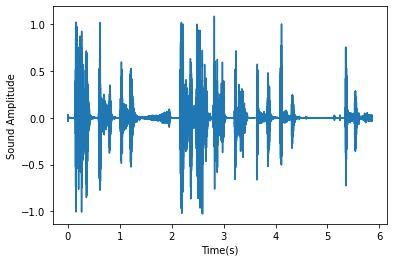

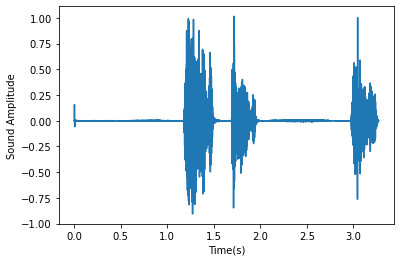

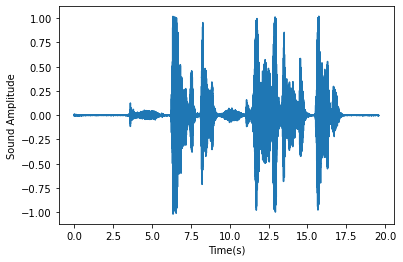

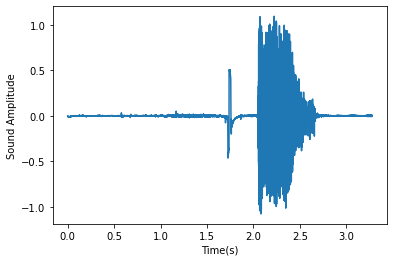

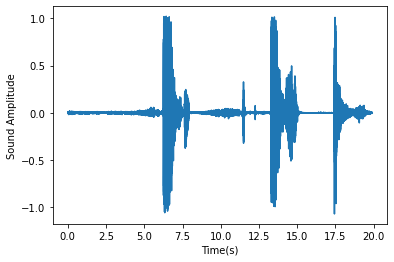

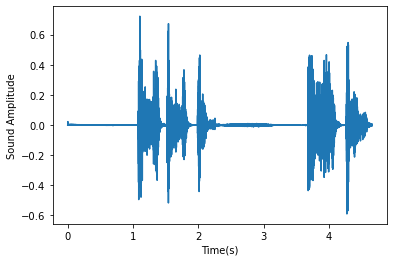

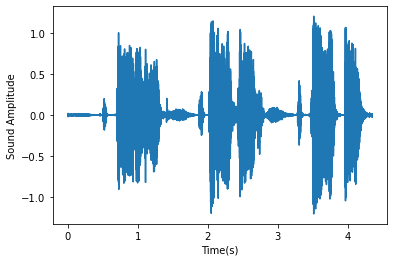

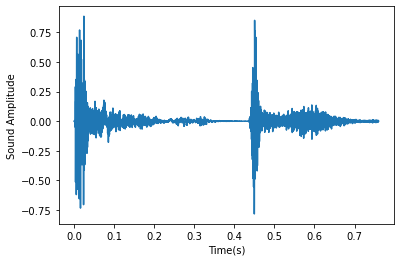

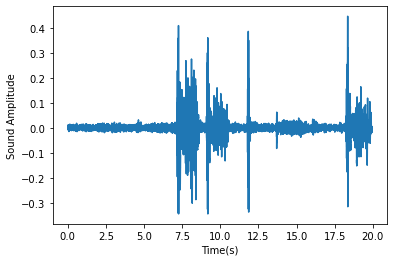

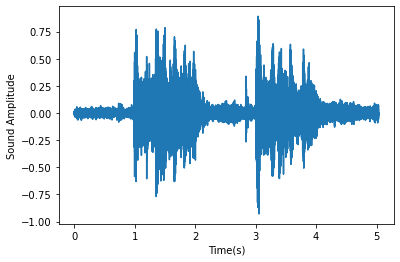

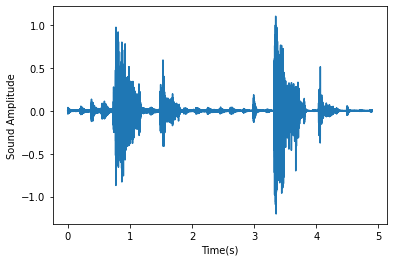

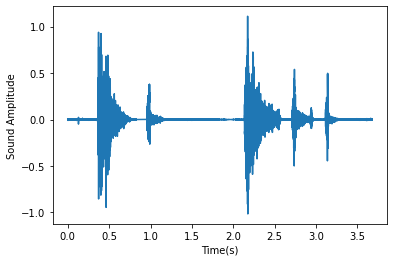

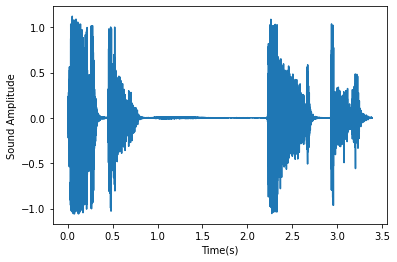

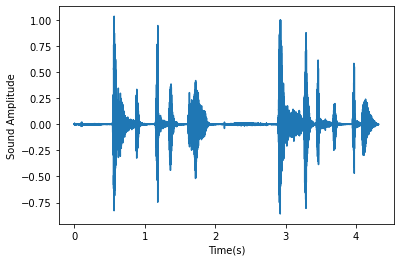

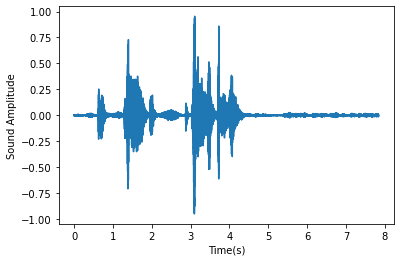

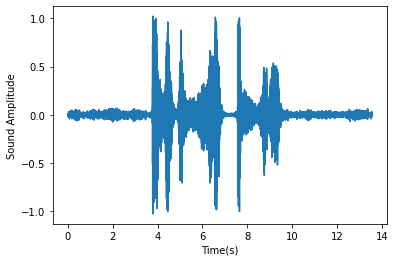

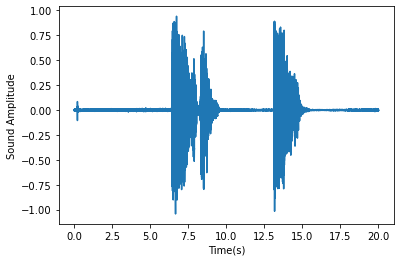

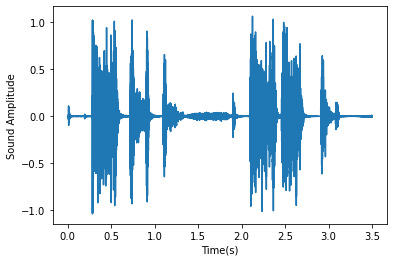

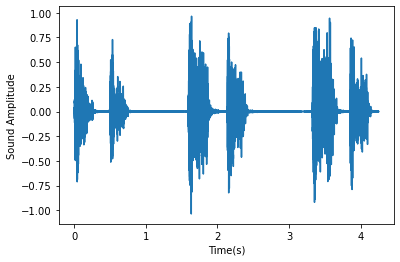

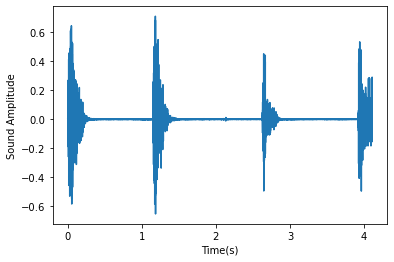

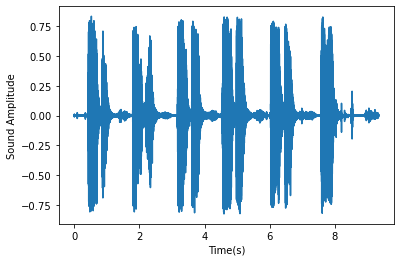

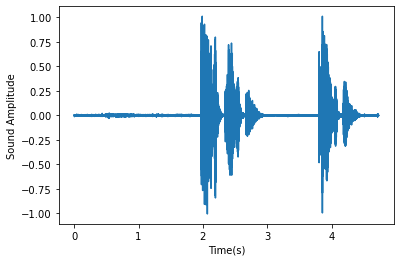

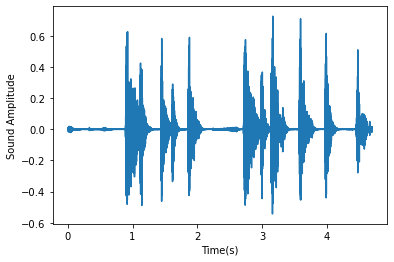

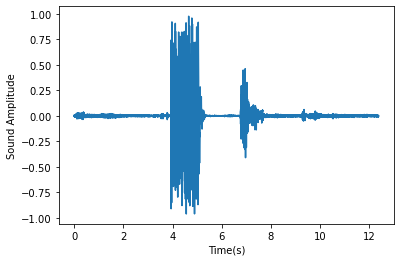

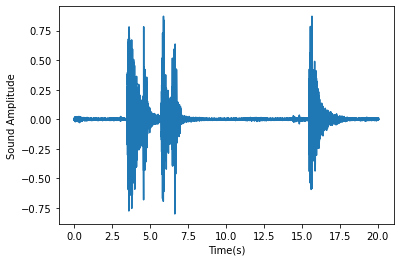

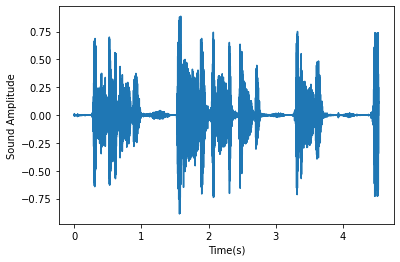

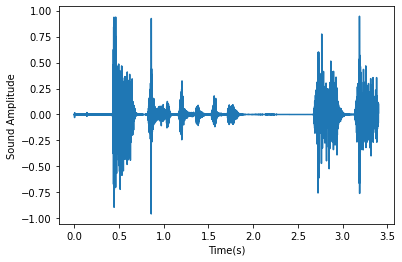

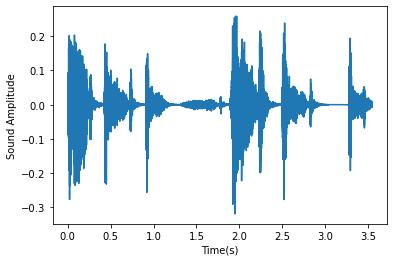

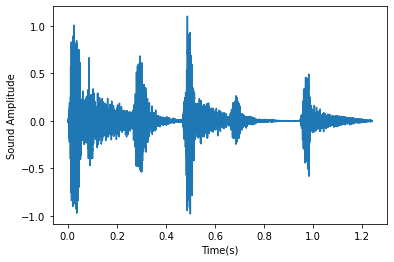

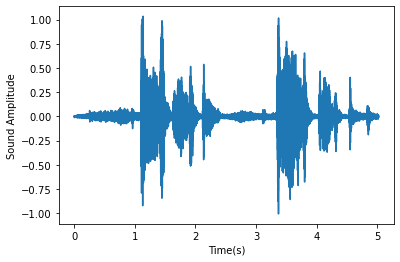

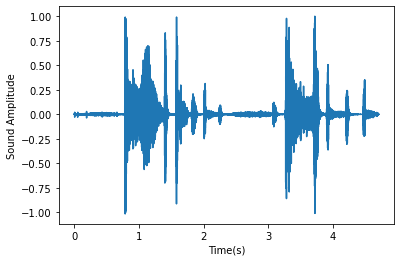

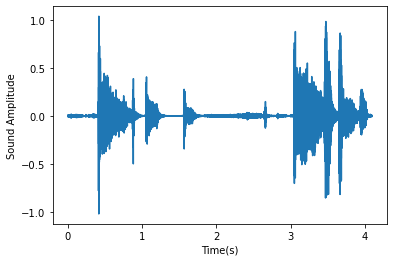

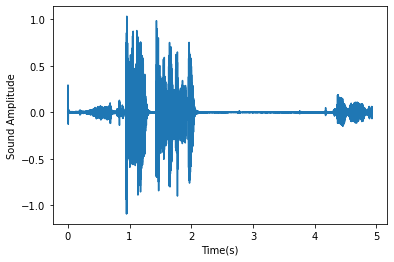

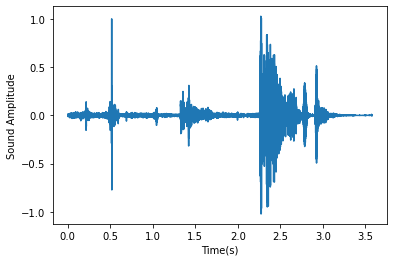

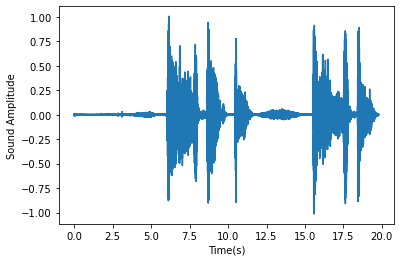

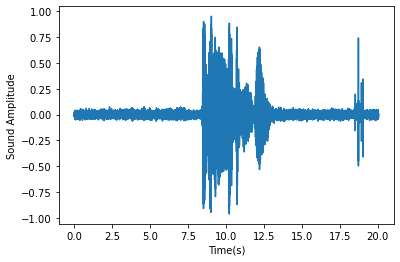

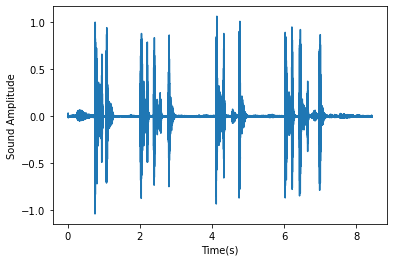

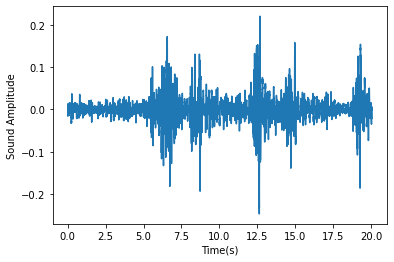

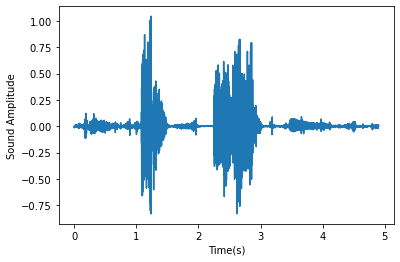

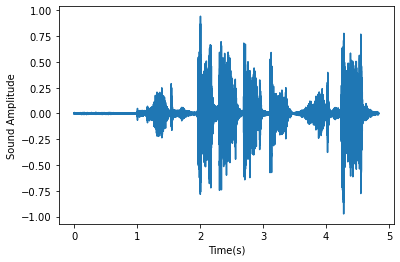

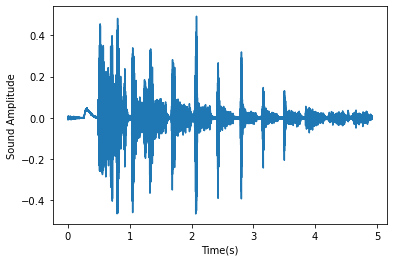

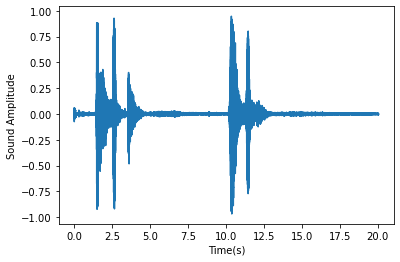

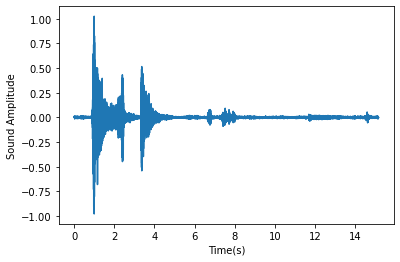

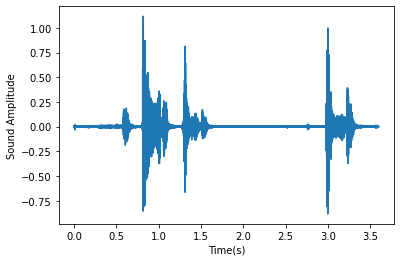

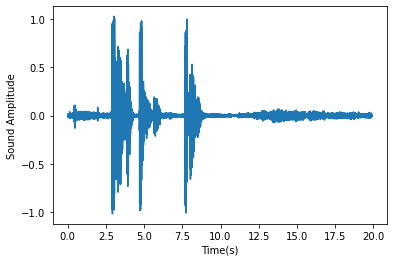

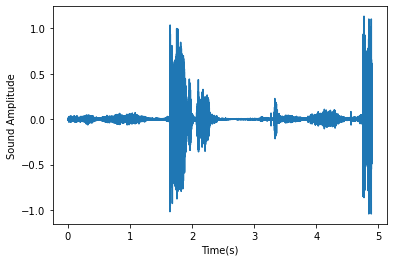

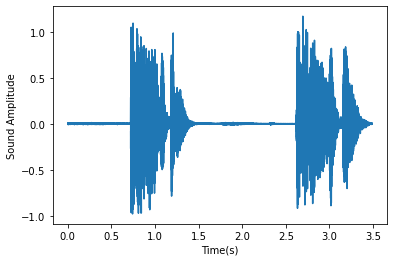

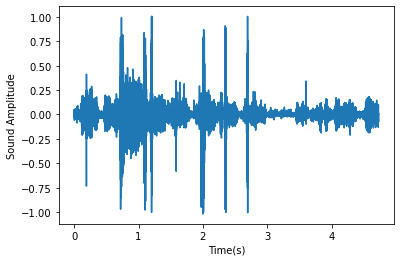

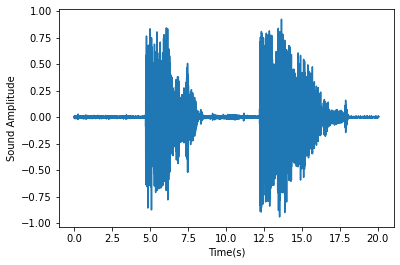

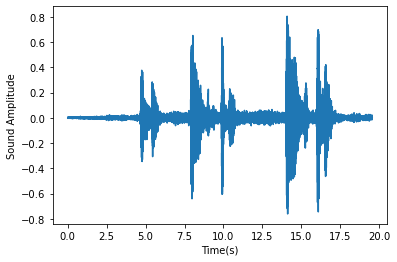

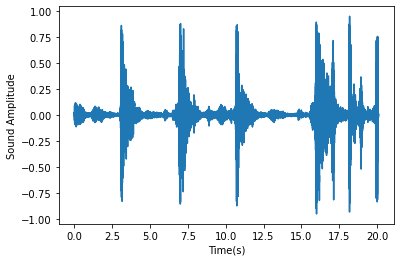

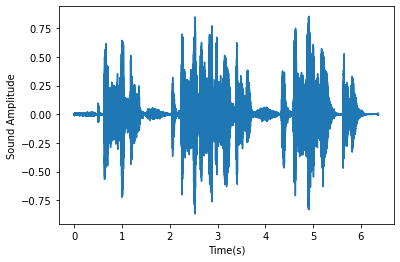

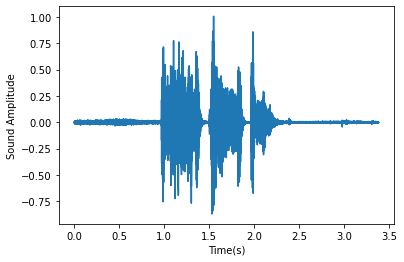

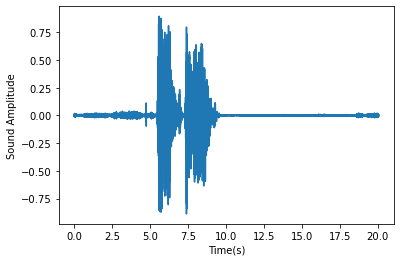

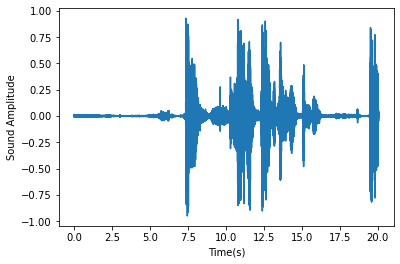

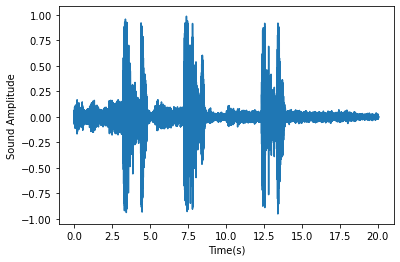

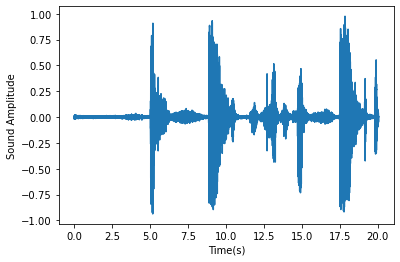

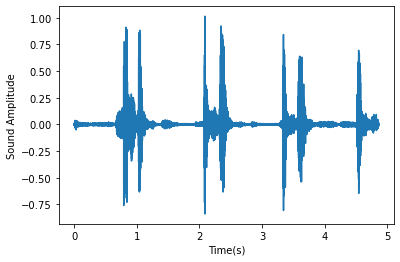

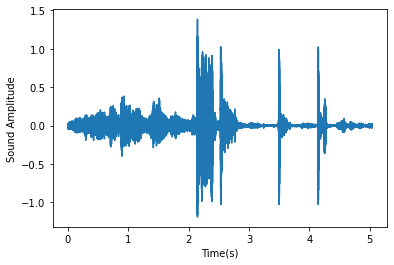

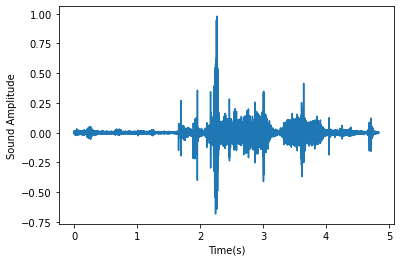

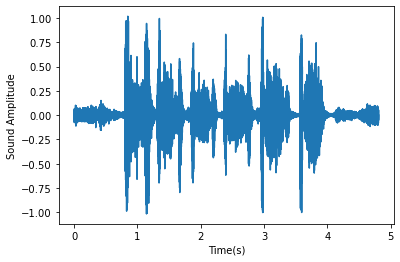

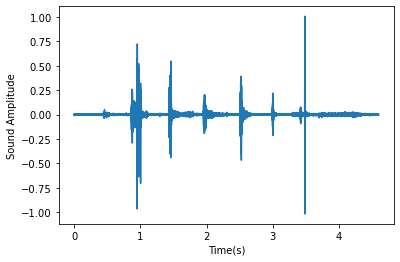

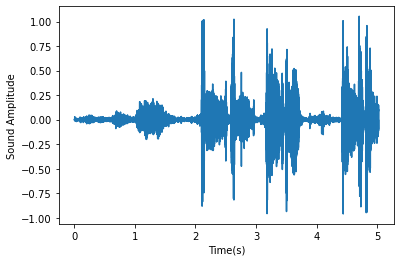

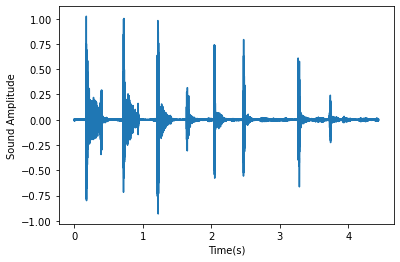

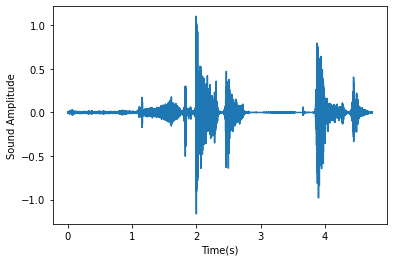

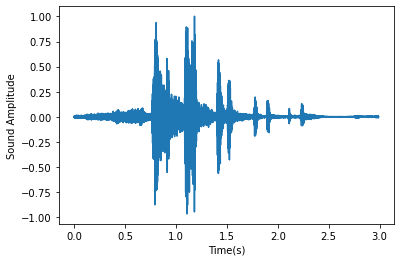

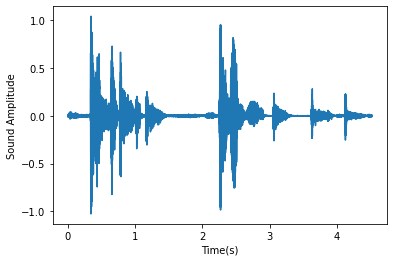

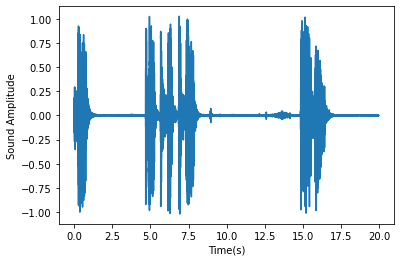

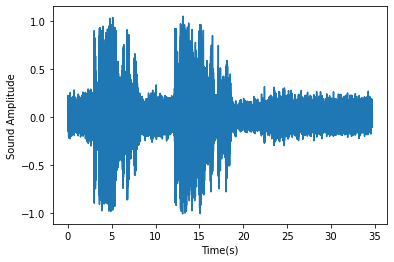

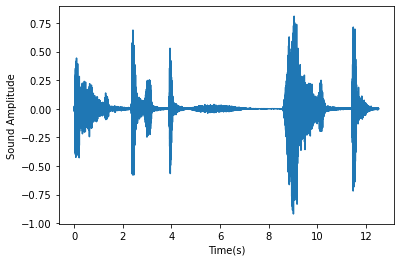

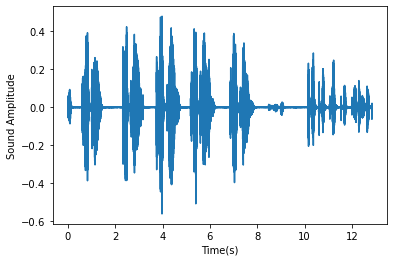

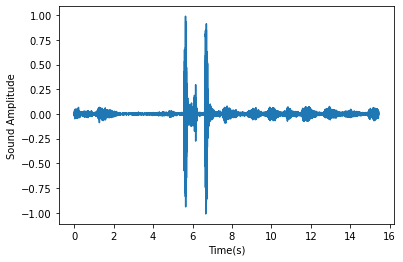

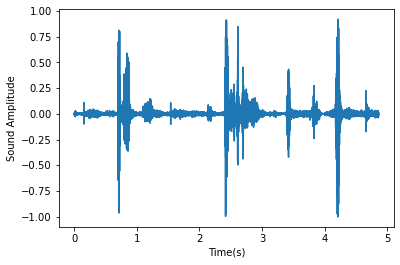

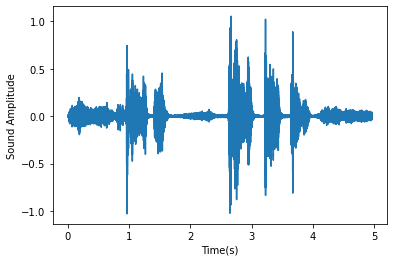

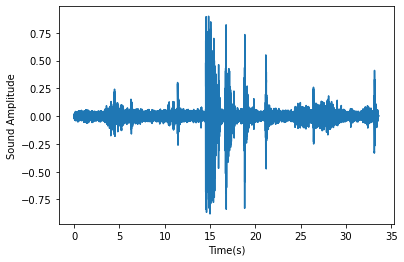

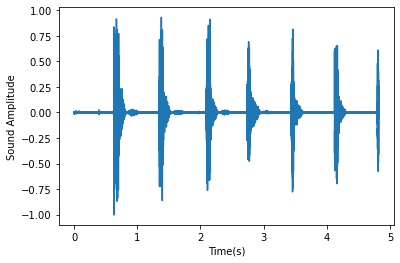

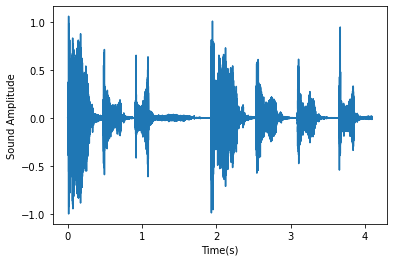

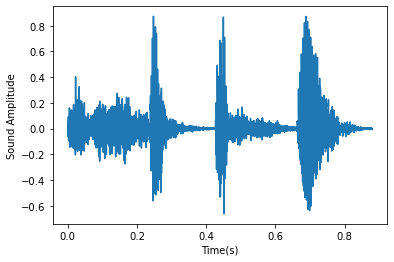

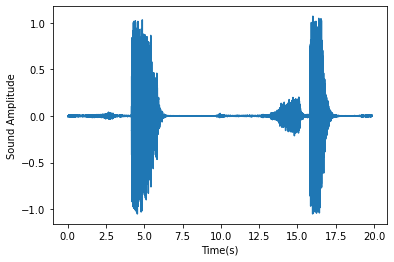

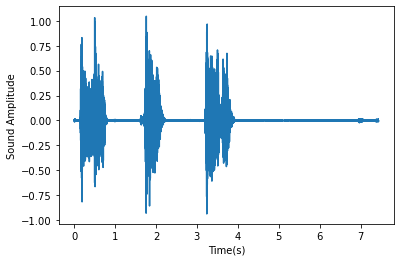

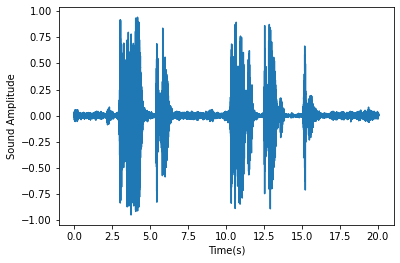

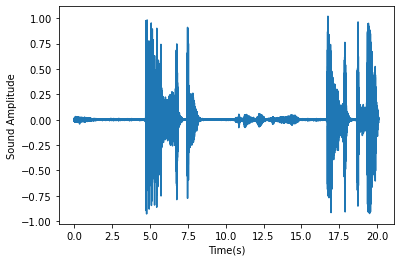

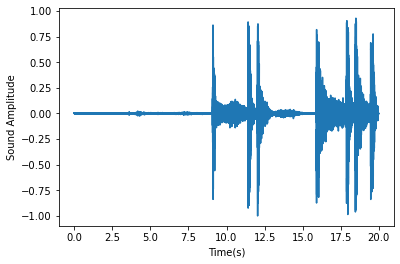

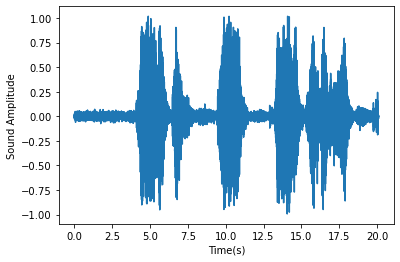

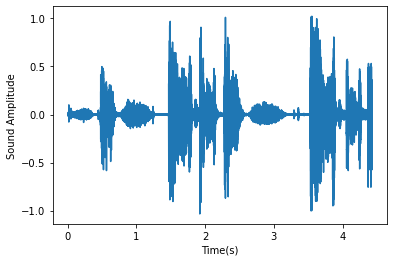

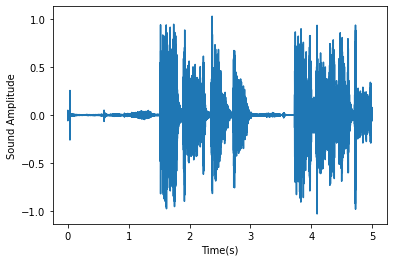

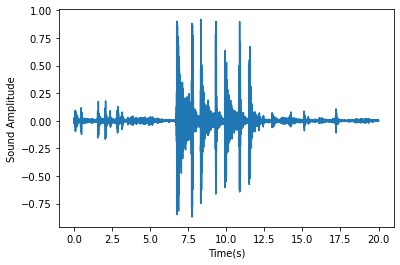

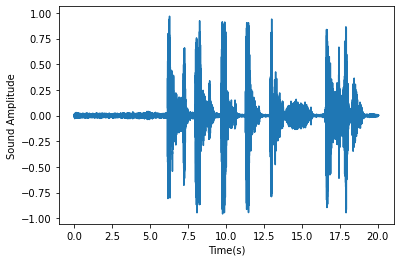

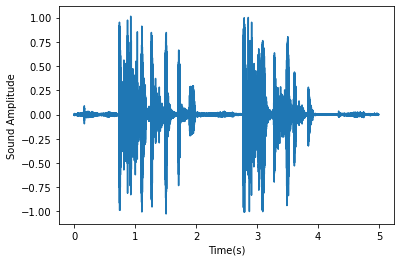

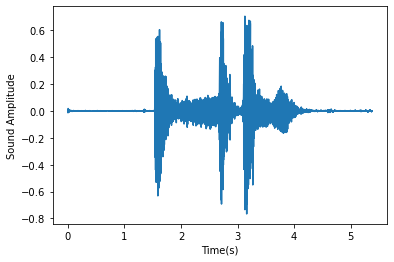

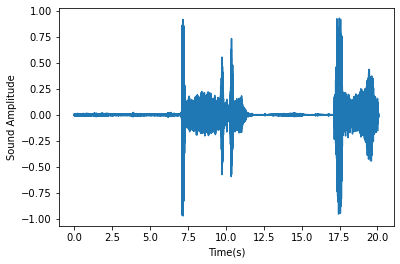

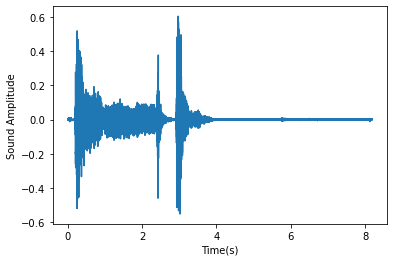

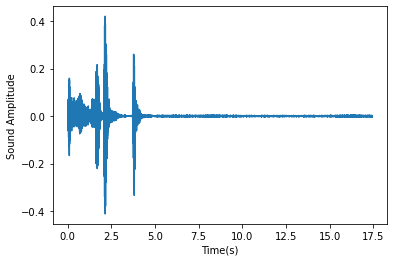

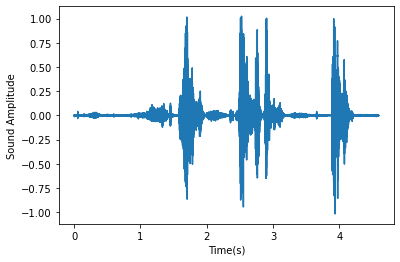

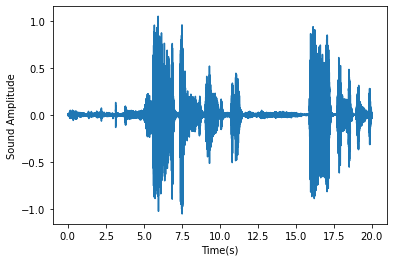

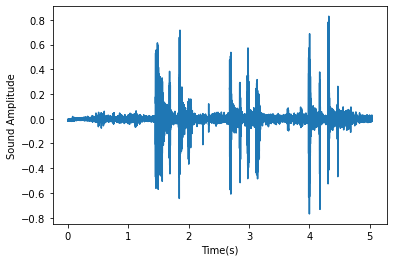

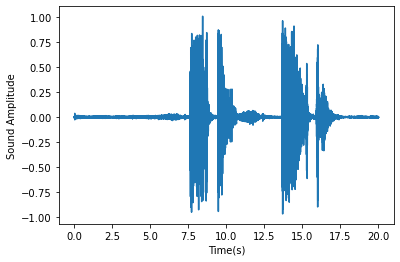

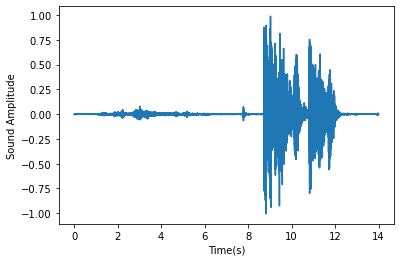

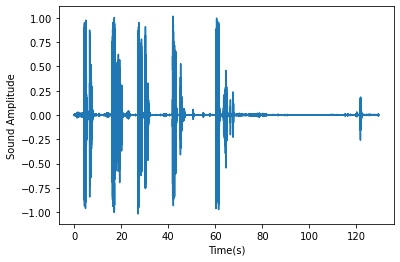

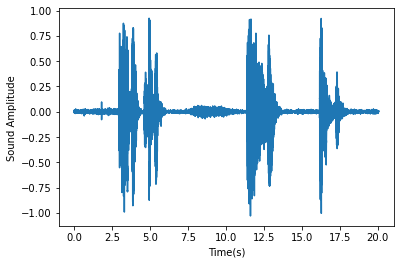

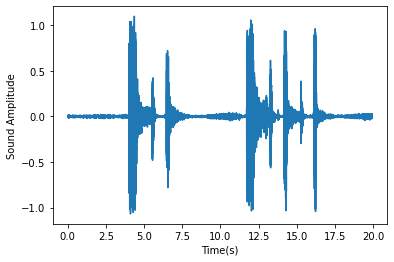

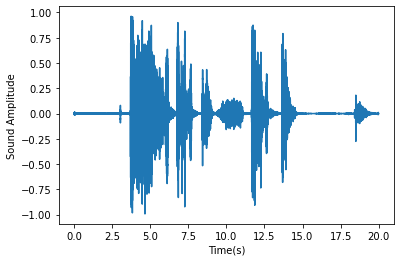

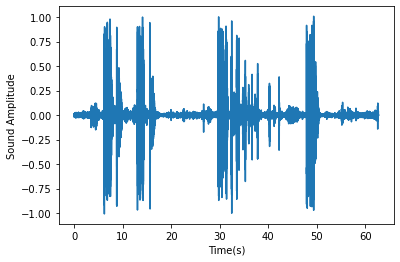

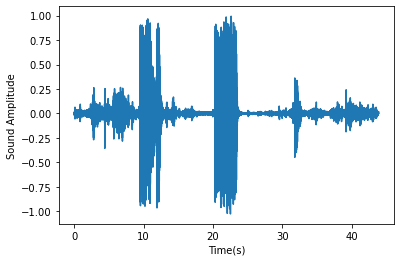

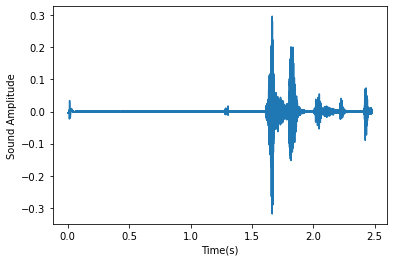

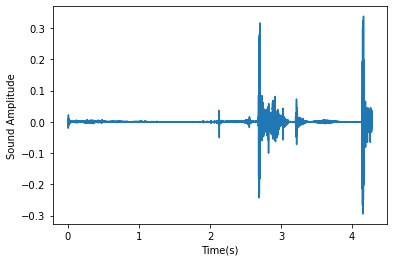

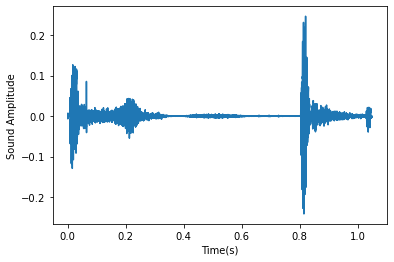

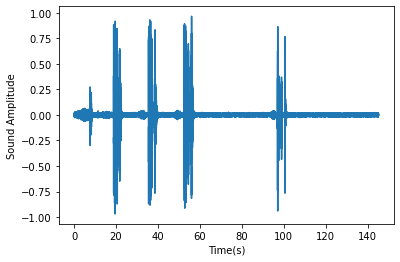

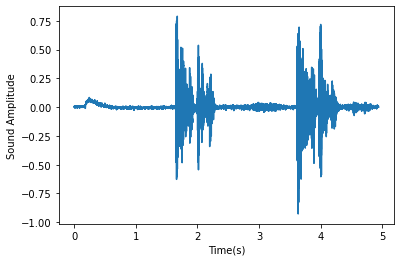

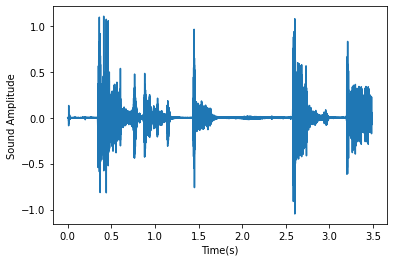

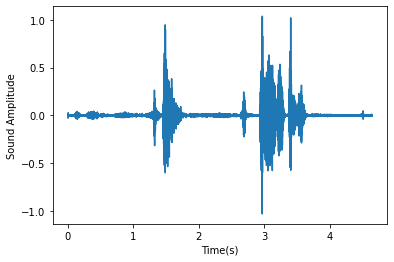

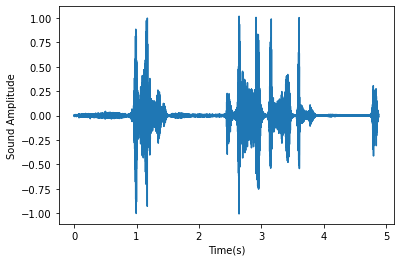

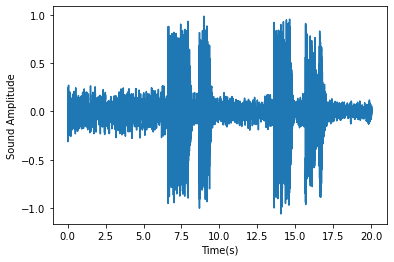

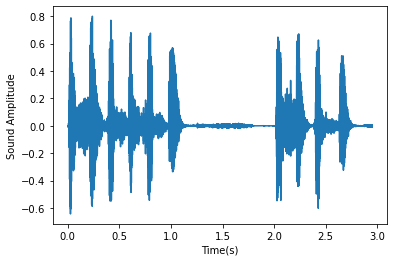

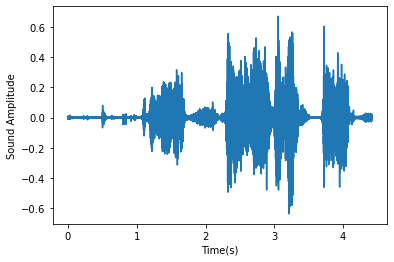

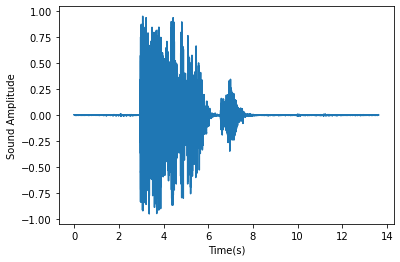

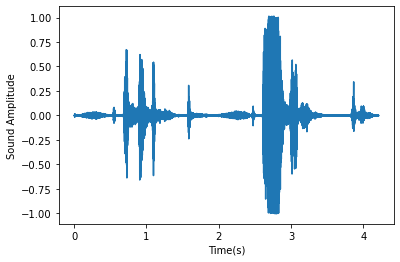

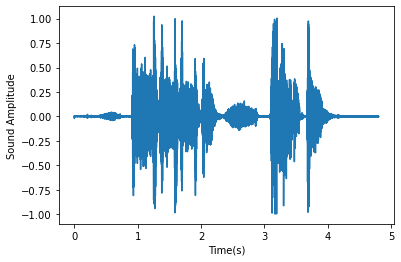

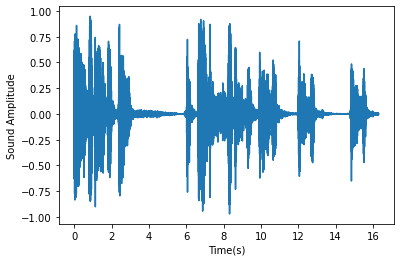

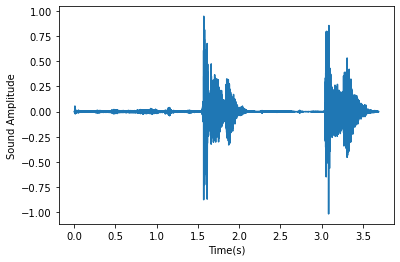

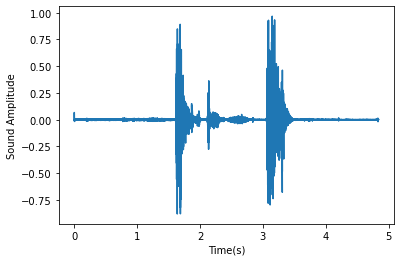

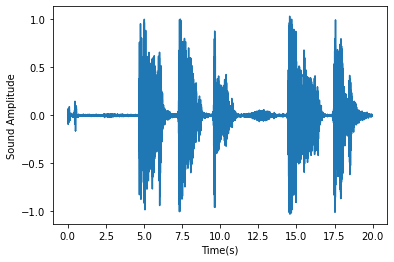

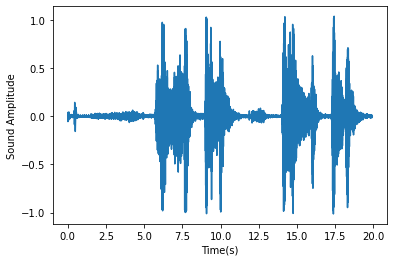

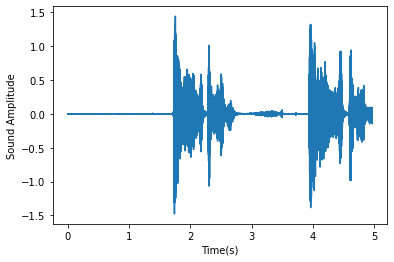

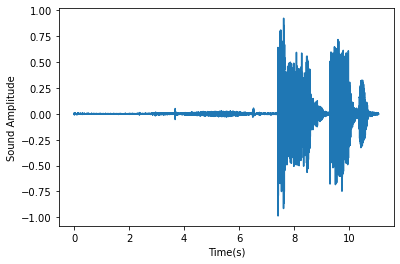

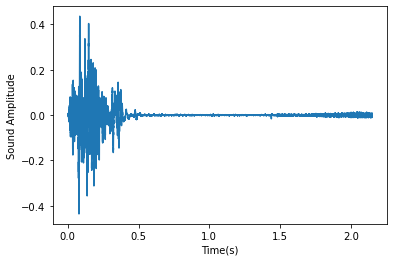

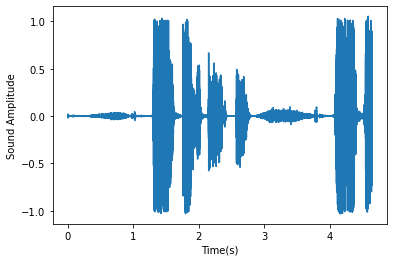

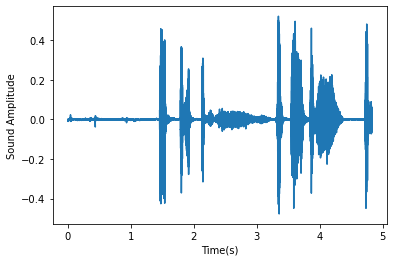

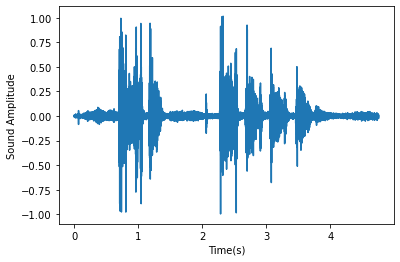

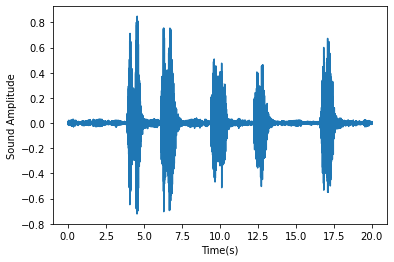

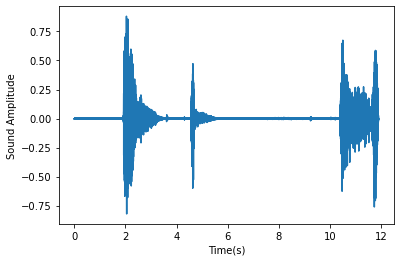

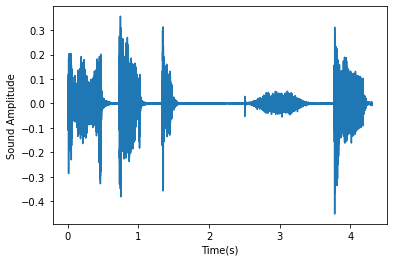

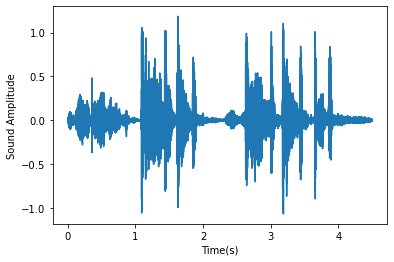

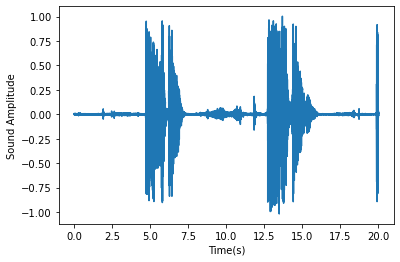

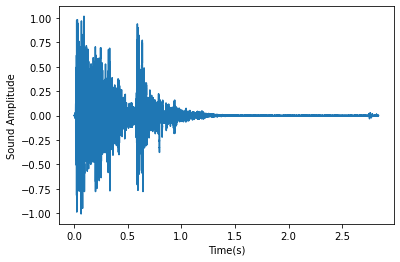

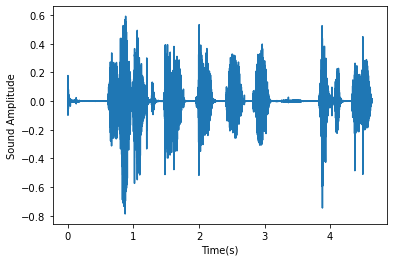

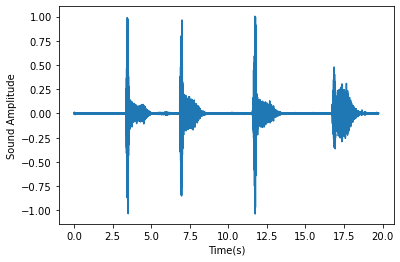

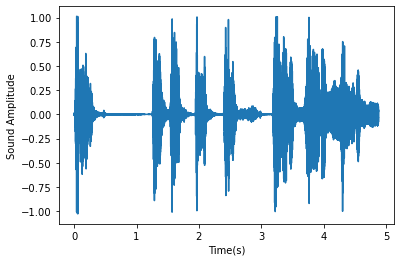

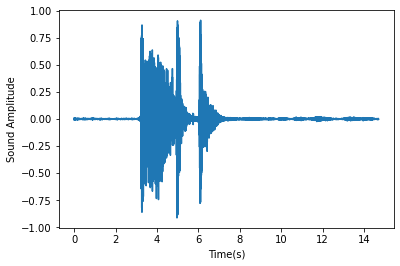

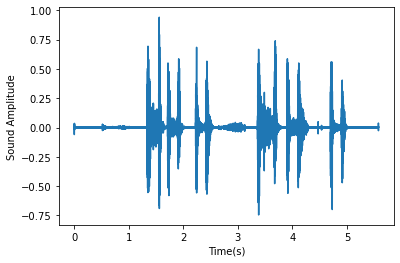

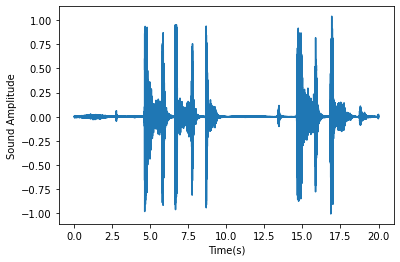

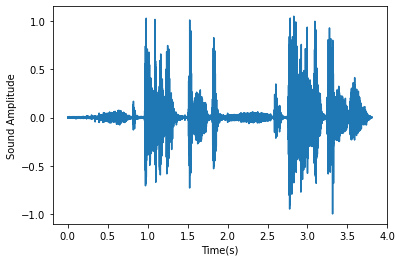

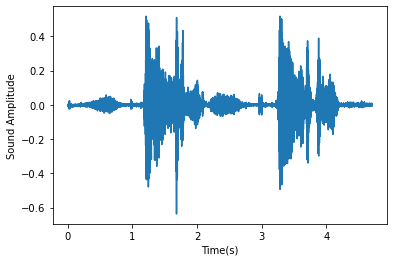

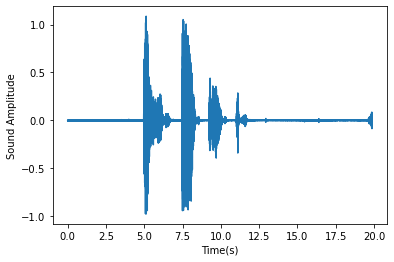

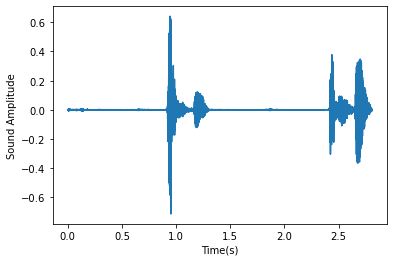

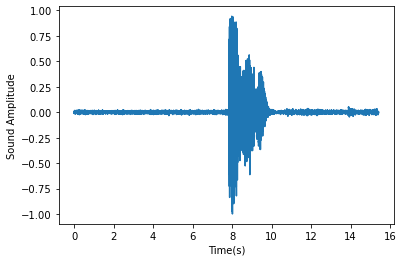

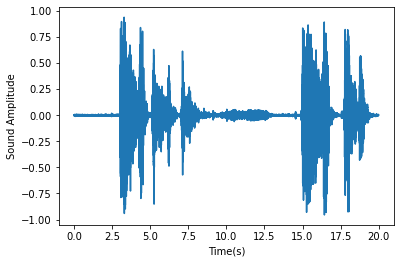

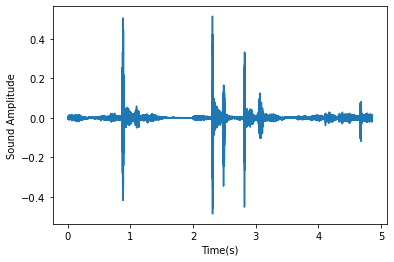

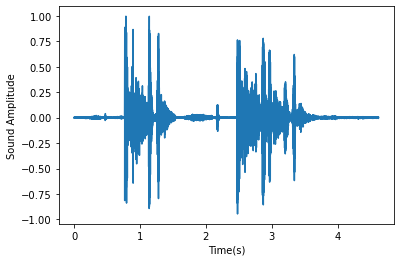

Wall time: 1min 45s


In [29]:
%%time
for file in range(0, len(audio_files), 1):
    count=0
    audio, sfreq =lr.load(audio_files[file])
    time =np.arange(0, len(audio))/ sfreq
    
    fig, ax= plt.subplots()
    ax.plot(time,audio)
    ax.set (xlabel ='Time(s)', ylabel= 'Sound Amplitude')
    plt.savefig('C:/Users/Asus/Documents/COVID19/spectrograms_for_unsplit_audio/' +str(file) + ".png")
    plt.show()
    count+=1
#print(count)

for file in range(0, len(audio_files), 1):
    
    print(audio_files[file])

In [84]:
val=[]
myDict = {}
for file in range(0, len(audio_files), 1):
    val = audio_files[file]
    myDict[file] = val
df = pd.DataFrame.from_dict(myDict, orient='index')
    


In [85]:
df

0
0    C:/Users/Asus/Documents/COVID19/chunks_covid_t...
1    C:/Users/Asus/Documents/COVID19/chunks_covid_t...
2    C:/Users/Asus/Documents/COVID19/chunks_covid_t...
3    C:/Users/Asus/Documents/COVID19/chunks_covid_t...
4    C:/Users/Asus/Documents/COVID19/chunks_covid_t...
..                                                 ...
283  C:/Users/Asus/Documents/COVID19/chunks_covid_t...
284  C:/Users/Asus/Documents/COVID19/chunks_covid_t...
285  C:/Users/Asus/Documents/COVID19/chunks_covid_t...
286  C:/Users/Asus/Documents/COVID19/chunks_covid_t...
287  C:/Users/Asus/Documents/COVID19/chunks_covid_t...

[288 rows x 1 columns]

In [86]:
new = df[0].str.split(r"chunks_covid_trimmed\\", n = 2, expand = True) 


In [87]:
new

0                  1
0    C:/Users/Asus/Documents/COVID19/  1586793423518.wav
1    C:/Users/Asus/Documents/COVID19/  1586850463146.wav
2    C:/Users/Asus/Documents/COVID19/  1587042586994.wav
3    C:/Users/Asus/Documents/COVID19/  1587206042393.wav
4    C:/Users/Asus/Documents/COVID19/  1587206113525.wav
..                                ...                ...
283  C:/Users/Asus/Documents/COVID19/  1605546575765.wav
284  C:/Users/Asus/Documents/COVID19/  1605568024007.wav
285  C:/Users/Asus/Documents/COVID19/  1605574542532.wav
286  C:/Users/Asus/Documents/COVID19/  1605577878440.wav
287  C:/Users/Asus/Documents/COVID19/  1605585337340.wav

[288 rows x 2 columns]

In [88]:
new.drop(columns =[0], inplace = True)  

In [89]:
new

1
0    1586793423518.wav
1    1586850463146.wav
2    1587042586994.wav
3    1587206042393.wav
4    1587206113525.wav
..                 ...
283  1605546575765.wav
284  1605568024007.wav
285  1605574542532.wav
286  1605577878440.wav
287  1605585337340.wav

[288 rows x 1 columns]

In [90]:
new[1].replace('.wav', '',regex=True,inplace=True)

In [91]:
new

1
0    1586793423518
1    1586850463146
2    1587042586994
3    1587206042393
4    1587206113525
..             ...
283  1605546575765
284  1605568024007
285  1605574542532
286  1605577878440
287  1605585337340

[288 rows x 1 columns]

In [92]:
new['filename'] = new.index 

In [93]:
new

1  filename
0    1586793423518         0
1    1586850463146         1
2    1587042586994         2
3    1587206042393         3
4    1587206113525         4
..             ...       ...
283  1605546575765       283
284  1605568024007       284
285  1605574542532       285
286  1605577878440       286
287  1605585337340       287

[288 rows x 2 columns]

In [94]:
labeled_data =pd.read_json(r'C:/Users/Asus/Documents/COVID19/records_1611742128218.json')


dataframe = labeled_data[['correlation','fileName']]
dataframe['fileName']=dataframe['fileName'].str.replace(".aac", "")

<ipython-input-94-648a94d01432>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['fileName']=dataframe['fileName'].str.replace(".aac", "")


In [95]:
labeled_data

id              time             country    status  \
0    KQlY5NefNw1QrvnECUzR  2021-01-09 05:39         Netherlands   Pending   
1    SmA1FXu1e4LDxPr1WzAF  2021-01-05 01:28           Australia   Pending   
2    pUGrCxUGxJYkmSJrlWQf  2020-12-10 10:23               Spain   Pending   
3    bnwHWmq1pbNng3FUdw5b  2020-12-09 19:56               Spain   Pending   
4    jUfa4DToJmLXsGgQciE8  2020-12-09 15:40               Spain   Pending   
..                    ...               ...                 ...       ...   
506  xVgrzhNlDGiQIZXff5Vs  2020-04-18 10:35          Kazakhstan   Pending   
507  q4NsmS5Ylhs2CBNAeS6k  2020-04-16 13:12       United States   Pending   
508  FtLgJX8Tuy2LsbXuOlNk  2020-04-14 07:48      United Kingdom   Pending   
509  f2KB0qT4KO1l6y3DPRRT  2020-04-13 15:58          Kazakhstan  Accepted   
510  fh0ZYHzmwX8GD0k05RLE  2021-01-25 02:22  Russian Federation   Pending   

     age  duration          city           fileName  \
0     61      5000  valkenswaard  1610170693896.aac   
1     36      5032           nsw  1609810031774.aac   
2     19      5033        madrid  1607595710449.aac   
3     43      5000        madrid  1607543704820.aac   
4     41      5033        madrid  1607528347861.aac   
..   ...       ...           ...                ...   
506   55      3000    Nur-Sultan  1587206042393.aac   
507   36      5000      muskegon  1587042586994.aac   
508   24      5000        London  1586850463146.aac   
509   45      5000    Nur-sultan  1586793423518.aac   
510   37      5000     Челябинск  1611541233040.aac   

                    correlation         coughType  gender        cough  \
0          Pneumonia/Bronchitis  Wet (productive)    Male  Spontaneous   
1          Pneumonia/Bronchitis  Wet (productive)  Female       Forced   
2          Pneumonia/Bronchitis               Dry    Male       Forced   
3          Pneumonia/Bronchitis               Dry    Male       Forced   
4          Pneumonia/Bronchitis               Dry    Male  Spontaneous   
..                          ...               ...     ...          ...   
506                       Other               Dry  Female       Forced   
507                      Asthma  Wet (productive)    Male       Forced   
508                      Cardio               Dry    Male       Forced   
509                       Other               Dry    Male       Forced   
510  I do not  have a diagnosis  Wet (productive)    Male  Spontaneous   

              diagnostic    smoking                               gravity  \
0    Bacterial infection  Nonsmoker  Doctor requested specialist referral   
1    Bacterial infection     Smoker            Doctor prescribed medicine   
2                Unknown     Smoker     Doctor set up a follow-up meeting   
3                Unknown  Nonsmoker                         Least concern   
4                Unknown     Smoker            Doctor prescribed medicine   
..                   ...        ...                                   ...   
506              Unknown  Nonsmoker                         Least concern   
507              Unknown  Nonsmoker                         Least concern   
508              Unknown  Nonsmoker                         Least concern   
509              Unknown  Nonsmoker                         Least concern   
510                  NaN     Smoker                         Least concern   

                                                  link  \
0    https://firebasestorage.googleapis.com/v0/b/co...   
1    https://firebasestorage.googleapis.com/v0/b/co...   
2    https://firebasestorage.googleapis.com/v0/b/co...   
3    https://firebasestorage.googleapis.com/v0/b/co...   
4    https://firebasestorage.googleapis.com/v0/b/co...   
..                                                 ...   
506  https://firebasestorage.googleapis.com/v0/b/co...   
507  https://firebasestorage.googleapis.com/v0/b/co...   
508  https://firebasestorage.googleapis.com/v0/b/co...   
509  https://firebasestorage.googleapis.com

In [96]:
dataframe

correlation       fileName
0          Pneumonia/Bronchitis  1610170693896
1          Pneumonia/Bronchitis  1609810031774
2          Pneumonia/Bronchitis  1607595710449
3          Pneumonia/Bronchitis  1607543704820
4          Pneumonia/Bronchitis  1607528347861
..                          ...            ...
506                       Other  1587206042393
507                      Asthma  1587042586994
508                      Cardio  1586850463146
509                       Other  1586793423518
510  I do not  have a diagnosis  1611541233040

[511 rows x 2 columns]

In [97]:
fname_with_index=new.join(dataframe.set_index('fileName'), on='filename')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat